# **Generative Adversarial Network (GAN) Implementation**




Shachar Wild 


**Code running requirements:**



*   Changing the paths to the desired files and directories
*   Atleast 25 GB of RAM avaialble
*   Prefably using run time accelerator, such as GPU
*   Running part 1 and part 2 separately









# Part 1 - Generative Adversarial Networks



## Installations and Imports

In [ ]:
!pip install arff
import os
import shutil

import arff
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn import preprocessing


import keras
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation
from keras.models import Model,Sequential
from tqdm.notebook import tqdm
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from keras.utils.vis_utils import plot_model

from sklearn.decomposition import PCA
from scipy.spatial import distance
import matplotlib.pyplot as plt
from numpy import zeros
from numpy import ones
import pandas as pd
import numpy as np
from scipy.io import arff
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
import tensorflow as tf
import time
import warnings
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.losses import binary_crossentropy
from sklearn.metrics import log_loss
import random
from sklearn.metrics import confusion_matrix, accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

%matplotlib inline

  Created wheel for arff: filename=arff-0.9-cp37-none-any.whl size=4970 sha256=3ed277119ba972c33ce30aebfbf4d78fe65c28944d388da502165c89873d7bfd
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preproccessing

The two datasets contain both categorial and numeric features:
*   **categorical features** should be converted binary columns, using One Hot Encoding Proces
*   As for the **numeric features**, before using these databases, their attribute values were all scaled to be in
the interval [0,1] by the min-max method. This was done because it makes the range for
all attributes to be the same, preventing one of them to dominate the others because of its
scale. This reduces the range of values that the generator has to produce as well

The total number of features for each dataset will be, as following: Number of numeric features + One Hot Encoding features 





### Diabetes Dataset

In [ ]:
diabetes_df = arff.loadarff('/content/drive/Shareddrives/ann2/ass4/diabetes.arff')
diabetes_df = pd.DataFrame(diabetes_df[0])
diabetes_df.head() 

preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


In [ ]:
def covert_objects_to_strings(df, col_names):
  for col_name in col_names:
    df[col_name] = df[col_name].str.decode("utf-8")
  return df

In [ ]:
# convert bytestream objects to strings 
col_names = ['class']
diabetes_df = covert_objects_to_strings(diabetes_df, col_names)

In [ ]:
# convert categorcial data to dummies
diabetes_df = pd.get_dummies(diabetes_df, columns=['class'])

In [ ]:
# Normalize data
def normalize_df(df):
  x = df.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  norm_df = pd.DataFrame(x_scaled)
  norm_df.columns = df.columns
  return norm_df

diabetes_df = normalize_df(diabetes_df)

In [ ]:
diabetes_df.head()

preg      plas  ...  class_tested_negative  class_tested_positive
0  0.352941  0.743719  ...                    0.0                    1.0
1  0.058824  0.427136  ...                    1.0                    0.0
2  0.470588  0.919598  ...                    0.0                    1.0
3  0.058824  0.447236  ...                    1.0                    0.0
4  0.000000  0.688442  ...                    0.0                    1.0

[5 rows x 10 columns]

### German Credit Dataset

In [ ]:
german_credit_df = arff.loadarff('/content/drive/Shareddrives/ann2/ass4/german_credit.arff')
german_credit_df = pd.DataFrame(german_credit_df[0])
german_credit_df.head()

1     2       3       4       5  ...       17   18       19       20    21
0  b'A11'   6.0  b'A34'  b'A43'  1169.0  ...  b'A173'  1.0  b'A192'  b'A201'  b'1'
1  b'A12'  48.0  b'A32'  b'A43'  5951.0  ...  b'A173'  1.0  b'A191'  b'A201'  b'2'
2  b'A14'  12.0  b'A34'  b'A46'  2096.0  ...  b'A172'  2.0  b'A191'  b'A201'  b'1'
3  b'A11'  42.0  b'A32'  b'A42'  7882.0  ...  b'A173'  2.0  b'A191'  b'A201'  b'1'
4  b'A11'  24.0  b'A33'  b'A40'  4870.0  ...  b'A173'  2.0  b'A191'  b'A201'  b'2'

[5 rows x 21 columns]

In [ ]:
german_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1000 non-null   object 
 1   2       1000 non-null   float64
 2   3       1000 non-null   object 
 3   4       1000 non-null   object 
 4   5       1000 non-null   float64
 5   6       1000 non-null   object 
 6   7       1000 non-null   object 
 7   8       1000 non-null   float64
 8   9       1000 non-null   object 
 9   10      1000 non-null   object 
 10  11      1000 non-null   float64
 11  12      1000 non-null   object 
 12  13      1000 non-null   float64
 13  14      1000 non-null   object 
 14  15      1000 non-null   object 
 15  16      1000 non-null   float64
 16  17      1000 non-null   object 
 17  18      1000 non-null   float64
 18  19      1000 non-null   object 
 19  20      1000 non-null   object 
 20  21      1000 non-null   object 
dtypes: float64(7), object(14)
memory usage

In [ ]:
# convert bytestream objects to strings 
col_names = ['1', '3', '4', '6','7', '9', '10', '12', '14', '15', '17', '19', '20', '21']
german_credit_df = covert_objects_to_strings(german_credit_df, col_names)
german_credit_df.head()

1     2    3    4       5    6    7  ...    15   16    17   18    19    20 21
0  A11   6.0  A34  A43  1169.0  A65  A75  ...  A152  2.0  A173  1.0  A192  A201  1
1  A12  48.0  A32  A43  5951.0  A61  A73  ...  A152  1.0  A173  1.0  A191  A201  2
2  A14  12.0  A34  A46  2096.0  A61  A74  ...  A152  1.0  A172  2.0  A191  A201  1
3  A11  42.0  A32  A42  7882.0  A61  A74  ...  A153  1.0  A173  2.0  A191  A201  1
4  A11  24.0  A33  A40  4870.0  A61  A73  ...  A153  2.0  A173  2.0  A191  A201  2

[5 rows x 21 columns]

In [ ]:
# convert categorcial data to dummies
german_credit_df = pd.get_dummies(german_credit_df, columns=['1', '3', '4', '6','7', '9', '10', '12', '14', '15', '17', '19', '20', '21'])
german_credit_df.head()

2       5    8   11    13  ...  19_A192  20_A201  20_A202  21_1  21_2
0   6.0  1169.0  4.0  4.0  67.0  ...        1        1        0     1     0
1  48.0  5951.0  2.0  2.0  22.0  ...        0        1        0     0     1
2  12.0  2096.0  2.0  3.0  49.0  ...        0        1        0     1     0
3  42.0  7882.0  2.0  4.0  45.0  ...        0        1        0     1     0
4  24.0  4870.0  3.0  4.0  53.0  ...        0        1        0     0     1

[5 rows x 63 columns]

In [ ]:
german_credit_df = normalize_df(german_credit_df)
german_credit_df.head()

2         5         8        11  ...  20_A201  20_A202  21_1  21_2
0  0.029412  0.050567  1.000000  1.000000  ...      1.0      0.0   1.0   0.0
1  0.647059  0.313690  0.333333  0.333333  ...      1.0      0.0   0.0   1.0
2  0.117647  0.101574  0.333333  0.666667  ...      1.0      0.0   1.0   0.0
3  0.558824  0.419941  0.333333  1.000000  ...      1.0      0.0   1.0   0.0
4  0.294118  0.254209  0.666667  1.000000  ...      1.0      0.0   0.0   1.0

[5 rows x 63 columns]

## Create Model

In [ ]:
 def plot_losses(losses):
    epochs = np.arange(len(losses))
    plt.plot(epochs, losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [ ]:
# define a generator model
def generate_generator(input_dim):
    '''
    generata a generator module for the GAN.
    '''
    model = Sequential()
    model.add(Dense(input_dim + int(0.2 * input_dim), activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(input_dim, activation='linear'))
    return model
 
 
# define a discriminator model
def define_discriminator(input_dim):
    '''
    generate discriminator module for the GAN.
    '''
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def define_gan(generator, discriminator):
    '''
    merge generator and discriminator into a GAN , while the discriminator freezes its weights.
    '''
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator as input to th ediscriminator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
# plot the GAN
X = diabetes_df
G = generate_generator(X.shape[1])
D = define_discriminator(X.shape[1])
GAN = define_gan(G,D)

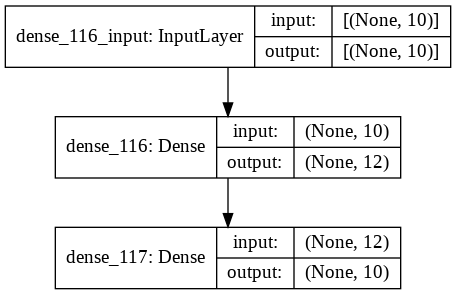

In [ ]:
plot_model(G, to_file='/content/generator_plot.png', show_shapes=True, show_layer_names=True)

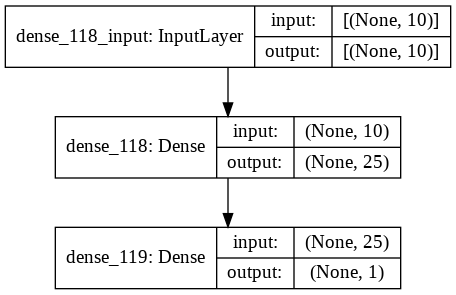

In [ ]:
plot_model(D, to_file='/content/discriminator_plot.png', show_shapes=True, show_layer_names=True)

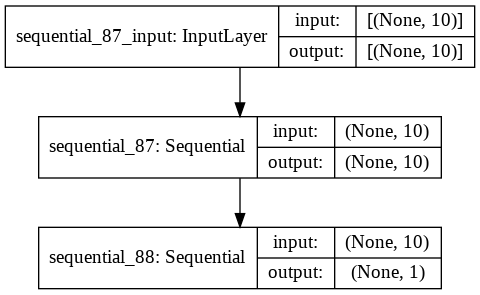

In [ ]:
plot_model(GAN, to_file='/content/GAN_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_noisy_samples(dim, n_samples):
    '''
    generate noise for the Generator input.
    '''
    samples = []
    for i in range(n_samples):
        noise = np.random.normal(0,1,dim)
        samples.append(noise)
    return np.array(samples)



def generate_fake_samples(generator,noise_dim,num_samples):
    # generate points in latent space
    X_noise = generate_noisy_samples(noise_dim,num_samples)
    # predict outputs
    X_generated = generator.predict(X_noise)
    return X_generated

In [ ]:
def train_GAN(G, D, GAN,X, n_epochs=100, n_batch=128,data_name=""):
    '''
    training GAN module and calculating G and D loss values.
    '''
    print('STARTING TO TRAIN GAN')
    X_train, X_val, y_train, y_val = generate_validation_set(X)
    print('GENERATED VALIDATION SET')
    checkpoint_dir = r'{}/GAN_training_checkpoints'.format(env)
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
    checkpoint = tf.train.Checkpoint(generator=G,
                                     discriminator=D)
    balanced_G_path = r'{}/{}/best_generator_model'.format(env,data_name)
    balanced_D_path = r'{}/{}/best_discriminator_model'.format(env,data_name)
    balanced_GAN_path = r'{}/{}/best_gan_model'.format(env,data_name)
    g_loss , d_loss, gan_loss, d_accuracy, epoch_convergence = [],[],[],[],[]
    results  = pd.DataFrame(columns=['g_loss', 'd_loss', 'gan_loss','d_accuracy','convergance'])

    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    counter = 0
    print('INITALIZED PARAMS... STARTING FIT')
    for i in range(n_epochs):
        print('working on epoch {}'.format(i))
        for j in range(int(X_train.shape[0]/half_batch)):
            # prepare real samples
            X_real = X_train[j*half_batch:(j+1)*half_batch]
            y_real = ones((X_real.shape[0],1))
            # prepare fake examples

            noise_dim = X_train.shape[1]
            #print('noise dim:', noise_dim)
            num_samples = half_batch
            X_fake = generate_fake_samples(G, noise_dim, num_samples)
            y_fake = zeros((half_batch,1))
            
            # update discriminator on real data & on generated (via G) samples
            D.train_on_batch(X_real, y_real)
            D.train_on_batch(X_fake, y_fake)
            
            # creating random noise as input to G
            num_samples = n_batch
            X_noise = generate_noisy_samples(noise_dim, num_samples)
            # create INVERTED labels for GAN
            y_gan = ones((num_samples, 1))
            # update GAN (withour chaning D weigihts, thus updating G only)
            # since labels are inverted, G will be updated via D's errors 
            GAN.train_on_batch(X_noise, y_gan)
            
        
        #generate new samples and assess Generator loss:
        noise_dim = X_val.shape[1]
        num_samples = X_val.shape[0]
        X_fake_validation = generate_fake_samples(G, noise_dim, num_samples)
        descriminator_output = D.predict(X_fake_validation)
        gloss = generator_loss(descriminator_output)
        
        # check how many time G fools D
        convergence = assess_convergence()
        if (i + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)
        
        # check discriminator loss on generator outputs (generated samples only): 
        ganloss = GAN.evaluate(X_val, y_val,verbose=0)
        #check discriminator loss & accuracy on real data mixed with noisy data
        dloss, daccuracy = D.evaluate(X_val, y_val,verbose=0)
        
        
        gan_loss.append(ganloss)
        d_loss.append(dloss)
        d_accuracy.append(daccuracy)
        epoch_convergence.append(convergence)
        g_loss.append(gloss)
        results = results.append(dict(zip(results.columns,[gloss, dloss, ganloss,daccuracy,convergence])), ignore_index=True)
        results.to_csv(r'{}/results_{}.csv'.format(env,data_name))
        print('losses are: GAN: {} , D : {} : G : {}'.format(ganloss,dloss,gloss))
        print('D accuracy is : {}'.format(daccuracy))
        #STOP CONDITION : descriminator is accuracte, but yet the generator fooled it
        if (daccuracy > 0.6)  and convergence > 40:
            print('BALANCED MODEL SAVED - at epoch {}_con_{}'.format(i,str(convergence)))
            G.save(balanced_G_path + '_epoch_{}_con_{}'.format(i,str(convergence))) 
            D.save(balanced_D_path + '_epoch_{}_con_{}'.format(i,str(convergence)))
            GAN.save(balanced_GAN_path + '_epoch_{}_con_{}'.format(i,str(convergence)))
            
    return gan_loss, d_loss, g_loss, d_accuracy, epoch_convergence, X_train, G, D


In [ ]:
def generate_validation_set(X):
    '''
    splitting X into train and test after adding noisy samples.
    '''
    '''add noisy samples with label "0" '''
    X_real = X
    y_real = ones((X_real.shape[0],1))
    noise_dim = X_real.shape[1]
    num_samples = X_real.shape[0]
    X_fake = generate_noisy_samples(noise_dim,num_samples)
    y_fake = zeros((num_samples,1))
    X_train = np.concatenate((X_real,X_fake))
    y_train = np.concatenate((y_real,y_fake))
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1000)
    return X_train, X_val, y_train, y_val

def generator_loss(predicted_by_D):
    '''
    calculating generator loss functiong 
    '''
    #predicted_by_D = np.concatenate(predicted_by_D).ravel().tolist()
    ones_array = ones(len(predicted_by_D))
    G_loss = binary_crossentropy(ones_array,predicted_by_D)
    G_loss = np.array(G_loss).mean()
    return G_loss

def assess_convergence():
    #generate 1000 samples using GENERATOR - check how many of them fooled the model.
    counter = 0
    n_samples = 1000
    for i in range(n_samples):
        sample_shape = X.shape[1]
        noise = np.random.normal(0,1,sample_shape).reshape(1,sample_shape)
        generated_sample = G.predict(noise)
        got_caught = D.predict(generated_sample)[0][0]
        if got_caught > 0.5:
            counter = counter + 1
    res = (counter / n_samples) * 100
    print('current epoch assessment is : {} percentage'.format(res))
    return res



In [ ]:
def draw_losses(d_loss, g_loss):
    # iteration num
    lst_iter = range(len(g_loss))    
    draw_result(lst_iter, d_loss, g_loss, "GAN losses")


def draw_result(lst_iter, lst_loss, lst_acc, title):

    plt.plot(lst_iter, lst_loss, '-b', label='D_losses')
    plt.plot(lst_iter, lst_acc, '-r', label='G_losses')

    plt.xlabel("n iteration")
    plt.legend(loc='upper left')
    plt.title(title)

    # save image
    plt.savefig(title+".png")  # should before show method

    # show
    plt.show()


## Training Phase

### Diabetes Dataset

In [ ]:
 def plot_losses(losses):
    epochs = np.arange(len(losses))
    plt.plot(epochs, losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [ ]:
# define a generator model
def generate_generator(input_dim):
    '''
    generata a generator module for the GAN.
    '''
    model = Sequential()
    model.add(Dense(input_dim + int(0.2 * input_dim), activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(input_dim, activation='linear'))
    return model
 
 
# define a discriminator model
def define_discriminator(input_dim):
    '''
    generate discriminator module for the GAN.
    '''
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def define_gan(generator, discriminator):
    '''
    merge generator and discriminator into a GAN , while the discriminator freezes its weights.
    '''
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator as input to th ediscriminator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
# plot the GAN
X = diabetes_df
G = generate_generator(X.shape[1])
D = define_discriminator(X.shape[1])
GAN = define_gan(G,D)

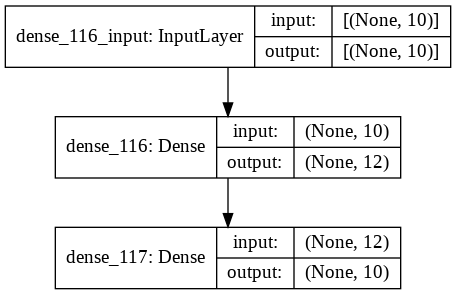

In [ ]:
plot_model(G, to_file='/content/generator_plot.png', show_shapes=True, show_layer_names=True)

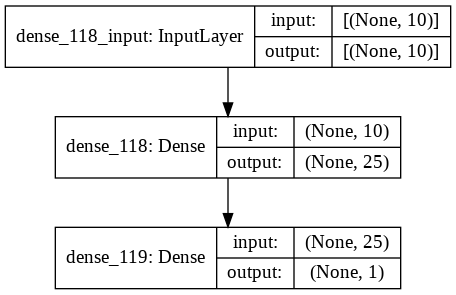

In [ ]:
plot_model(D, to_file='/content/discriminator_plot.png', show_shapes=True, show_layer_names=True)

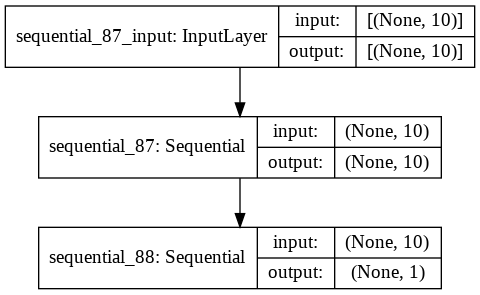

In [ ]:
plot_model(GAN, to_file='/content/GAN_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_noisy_samples(dim, n_samples):
    '''
    generate noise for the Generator input.
    '''
    samples = []
    for i in range(n_samples):
        noise = np.random.normal(0,1,dim)
        samples.append(noise)
    return np.array(samples)



def generate_fake_samples(generator,noise_dim,num_samples):
    # generate points in latent space
    X_noise = generate_noisy_samples(noise_dim,num_samples)
    # predict outputs
    X_generated = generator.predict(X_noise)
    return X_generated

In [ ]:
def train_GAN(G, D, GAN,X, n_epochs=100, n_batch=128,data_name=""):
    '''
    training GAN module and calculating G and D loss values.
    '''
    print('STARTING TO TRAIN GAN')
    X_train, X_val, y_train, y_val = generate_validation_set(X)
    print('GENERATED VALIDATION SET')
    checkpoint_dir = r'{}/GAN_training_checkpoints'.format(env)
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
    checkpoint = tf.train.Checkpoint(generator=G,
                                     discriminator=D)
    balanced_G_path = r'{}/{}/best_generator_model'.format(env,data_name)
    balanced_D_path = r'{}/{}/best_discriminator_model'.format(env,data_name)
    balanced_GAN_path = r'{}/{}/best_gan_model'.format(env,data_name)
    g_loss , d_loss, gan_loss, d_accuracy, epoch_convergence = [],[],[],[],[]
    results  = pd.DataFrame(columns=['g_loss', 'd_loss', 'gan_loss','d_accuracy','convergance'])

    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    counter = 0
    print('INITALIZED PARAMS... STARTING FIT')
    for i in range(n_epochs):
        print('working on epoch {}'.format(i))
        for j in range(int(X_train.shape[0]/half_batch)):
            # prepare real samples
            X_real = X_train[j*half_batch:(j+1)*half_batch]
            y_real = ones((X_real.shape[0],1))
            # prepare fake examples

            noise_dim = X_train.shape[1]
            #print('noise dim:', noise_dim)
            num_samples = half_batch
            X_fake = generate_fake_samples(G, noise_dim, num_samples)
            y_fake = zeros((half_batch,1))
            
            # update discriminator on real data & on generated (via G) samples
            D.train_on_batch(X_real, y_real)
            D.train_on_batch(X_fake, y_fake)
            
            # creating random noise as input to G
            num_samples = n_batch
            X_noise = generate_noisy_samples(noise_dim, num_samples)
            # create INVERTED labels for GAN
            y_gan = ones((num_samples, 1))
            # update GAN (withour chaning D weigihts, thus updating G only)
            # since labels are inverted, G will be updated via D's errors 
            GAN.train_on_batch(X_noise, y_gan)
            
        
        #generate new samples and assess Generator loss:
        noise_dim = X_val.shape[1]
        num_samples = X_val.shape[0]
        X_fake_validation = generate_fake_samples(G, noise_dim, num_samples)
        descriminator_output = D.predict(X_fake_validation)
        gloss = generator_loss(descriminator_output)
        
        # check how many time G fools D
        convergence = assess_convergence()
        if (i + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)
        
        # check discriminator loss on generator outputs (generated samples only): 
        ganloss = GAN.evaluate(X_val, y_val,verbose=0)
        #check discriminator loss & accuracy on real data mixed with noisy data
        dloss, daccuracy = D.evaluate(X_val, y_val,verbose=0)
        
        
        gan_loss.append(ganloss)
        d_loss.append(dloss)
        d_accuracy.append(daccuracy)
        epoch_convergence.append(convergence)
        g_loss.append(gloss)
        results = results.append(dict(zip(results.columns,[gloss, dloss, ganloss,daccuracy,convergence])), ignore_index=True)
        results.to_csv(r'{}/results_{}.csv'.format(env,data_name))
        print('losses are: GAN: {} , D : {} : G : {}'.format(ganloss,dloss,gloss))
        print('D accuracy is : {}'.format(daccuracy))
        #STOP CONDITION : descriminator is accuracte, but yet the generator fooled it
        if (daccuracy > 0.6)  and convergence > 40:
            print('BALANCED MODEL SAVED - at epoch {}_con_{}'.format(i,str(convergence)))
            G.save(balanced_G_path + '_epoch_{}_con_{}'.format(i,str(convergence))) 
            D.save(balanced_D_path + '_epoch_{}_con_{}'.format(i,str(convergence)))
            GAN.save(balanced_GAN_path + '_epoch_{}_con_{}'.format(i,str(convergence)))
            
    return gan_loss, d_loss, g_loss, d_accuracy, epoch_convergence, X_train, G, D


In [ ]:
def generate_validation_set(X):
    '''
    splitting X into train and test after adding noisy samples.
    '''
    '''add noisy samples with label "0" '''
    X_real = X
    y_real = ones((X_real.shape[0],1))
    noise_dim = X_real.shape[1]
    num_samples = X_real.shape[0]
    X_fake = generate_noisy_samples(noise_dim,num_samples)
    y_fake = zeros((num_samples,1))
    X_train = np.concatenate((X_real,X_fake))
    y_train = np.concatenate((y_real,y_fake))
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1000)
    return X_train, X_val, y_train, y_val

def generator_loss(predicted_by_D):
    '''
    calculating generator loss functiong 
    '''
    #predicted_by_D = np.concatenate(predicted_by_D).ravel().tolist()
    ones_array = ones(len(predicted_by_D))
    G_loss = binary_crossentropy(ones_array,predicted_by_D)
    G_loss = np.array(G_loss).mean()
    return G_loss

def assess_convergence():
    #generate 1000 samples using GENERATOR - check how many of them fooled the model.
    counter = 0
    n_samples = 1000
    for i in range(n_samples):
        sample_shape = X.shape[1]
        noise = np.random.normal(0,1,sample_shape).reshape(1,sample_shape)
        generated_sample = G.predict(noise)
        got_caught = D.predict(generated_sample)[0][0]
        if got_caught > 0.5:
            counter = counter + 1
    res = (counter / n_samples) * 100
    print('current epoch assessment is : {} percentage'.format(res))
    return res



In [ ]:
def draw_losses(d_loss, g_loss):
    # iteration num
    lst_iter = range(len(g_loss))    
    draw_result(lst_iter, d_loss, g_loss, "GAN losses")


def draw_result(lst_iter, lst_loss, lst_acc, title):

    plt.plot(lst_iter, lst_loss, '-b', label='D_losses')
    plt.plot(lst_iter, lst_acc, '-r', label='G_losses')

    plt.xlabel("n iteration")
    plt.legend(loc='upper left')
    plt.title(title)

    # save image
    plt.savefig(title+".png")  # should before show method

    # show
    plt.show()


In [ ]:
env = r'/content/drive/Shareddrives/ann2/ass4'

X = diabetes_df
# create noise input for generator
noise_dim = X.shape[1]
num_samples = X.shape[0]
noise_for_D = generate_noisy_samples(noise_dim,num_samples)
# define the generator & desciminator models
G = generate_generator(X.shape[1])
D = define_discriminator(X.shape[1])
# merge G & D into a GAN model
GAN = define_gan(G,D)
# train gan and perform PART1 experiments
gan_loss, d_loss, g_loss, d_accuracy, epoch_convergence, X_train, diabetes_g, diabetes_d = train_GAN(G, D, GAN,X, n_epochs=100, n_batch=70,data_name='diabetes_df')
    

STARTING TO TRAIN GAN
GENERATED VALIDATION SET
INITALIZED PARAMS... STARTING FIT
working on epoch 0
current epoch assessment is : 60.6 percentage
losses are: GAN: 0.7022217512130737 , D : 0.7005448937416077 : G : 0.72478848695755
D accuracy is : 0.64891517162323
BALANCED MODEL SAVED - at epoch 0_con_60.6
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ann2/ass4/diabetes_df/best_generator_model_epoch_0_con_60.6/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ann2/ass4/diabetes_df/best_discriminator_model_epoch_0_con_60.6/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ann2/ass4/diabetes_df/best_gan_model_epoch_0_con_60.6/assets
working on epoch 1
current epoch assessment is : 43.4 percentage
losses are: GAN: 0.6529229879379272 , D : 0.6719672679901123 : G : 0.8762492537498474
D accuracy is : 0.7218934893608093
BALANCED MODEL SAVED - at epoch 1_con_43.4
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ann2/ass4/diab

In [ ]:
# save model in disc
with open('/content/drive/Shareddrives/ann2/ass4/diabetes_gan', 'wb') as f:
    diabetes_gan = diabetes_g, diabetes_d
    pickle.dump(diabetes_gan, f)

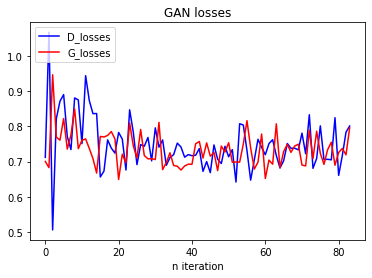

In [ ]:
results_df = pd.read_csv(r'{}/results_{}.csv'.format(env,'diabetes_df'))
d_loss = results_df.d_loss.values
g_loss = results_df.g_loss.values
gan_loss = results_df.gan_loss.values
draw_losses(d_loss, gan_loss)

### German Credit Dataset


In [ ]:
env = r'/content/drive/Shareddrives/ann2/ass4'

X = german_credit_df
# create noise input for generator
noise_dim = X.shape[1]
num_samples = X.shape[0]
noise_for_D = generate_noisy_samples(noise_dim,num_samples)
# define the generator & desciminator models
G = generate_generator(X.shape[1])
D = define_discriminator(X.shape[1])
# merge G & D into a GAN model
GAN = define_gan(G,D)
# train gan and perform PART1 experiments
gan_loss, d_loss, g_loss, d_accuracy, epoch_convergence, X_train, credit_g, credit_d = train_GAN(G, D, GAN,X, n_epochs=100, n_batch=80,data_name='german_credit_df')

STARTING TO TRAIN GAN
GENERATED VALIDATION SET
INITALIZED PARAMS... STARTING FIT
working on epoch 0
current epoch assessment is : 93.7 percentage
losses are: GAN: 0.9798741340637207 , D : 0.5398513078689575 : G : 0.31970977783203125
D accuracy is : 0.7636363506317139
BALANCED MODEL SAVED - at epoch 0_con_93.7
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ann2/ass4/german_credit_df/best_generator_model_epoch_0_con_93.7/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ann2/ass4/german_credit_df/best_discriminator_model_epoch_0_con_93.7/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ann2/ass4/german_credit_df/best_gan_model_epoch_0_con_93.7/assets
working on epoch 1
current epoch assessment is : 33.7 percentage
losses are: GAN: 0.7198747396469116 , D : 0.5521478652954102 : G : 0.9632860422134399
D accuracy is : 0.7909091114997864
working on epoch 2
current epoch assessment is : 44.3 percentage
losses are: GAN: 0.788269579410553 

In [ ]:
# save model in disc
with open('/content/drive/Shareddrives/ann2/ass4/credit_gan', 'wb') as f:
    diabetes_gan = credit_g, credit_d
    pickle.dump(diabetes_gan, f)

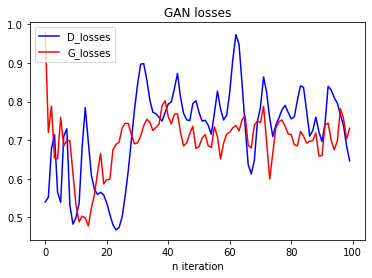

In [ ]:
results_df = pd.read_csv(r'{}/results_{}.csv'.format(env,'german_credit_df'))
d_loss = results_df.d_loss.values
g_loss = results_df.g_loss.values
gan_loss = results_df.gan_loss.values
draw_losses(d_loss, gan_loss)

## Analysis

We will analyze the products of our two models (one for each given dataset), as following:

In [ ]:
 def plot_losses(losses):
    epochs = np.arange(len(losses))
    plt.plot(epochs, losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

In [ ]:
# Generator
# Input: a noise vector
# Output: a vector of size N
def Generator(noise_size, output_length, loss, optimizer):
  model = Sequential()
  model.add(Dense(32, input_dim=noise_size))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Dense(64))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Dense(output_length))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.compile(loss=loss, optimizer=optimizer)
  return model
  

# Discriminator
# Input: a vector of size N
# Output: 0 (fake) or 1 (real)
def Discriminator(input_length, loss, optimizer):
  model = Sequential()
  model.add(Dense(64,input_dim=input_length))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  Dropout(0.1)

  model.add(Dense(32))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  Dropout(0.1)

  model.add(Dense(16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  Dropout(0.1)

  model.add(Dense(8))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss=loss, optimizer=optimizer)
  return model


def Gan(generator, discriminator, loss, optimizer):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss=loss, optimizer=optimizer)
    return model


In [ ]:

class Adverisal:

  def __init__ (self, input_length, noise_size, loss, optimizer, weights_dir, losses_dir):
    self.noise_size = noise_size
    self.weights_dir = weights_dir
    self.losses_dir = losses_dir
    os.makedirs(weights_dir, exist_ok=True)
    os.makedirs(losses_dir, exist_ok=True)



    self.generator = Generator(noise_size, input_length, loss, optimizer)
    self.discriminator = Discriminator(input_length, loss, optimizer)
    self.gan = Gan(self.generator, self.discriminator, loss, optimizer)
    self.discriminator_loss = []
    self.gan_loss = []
    

  def get_models(self):
    return self.generator, self.discriminator, self.gan  

  def train(self, data, num_epochs, batch_size): 
    # compute current epoch
    if os.path.exists(losses_dir + 'discriminator_loss.csv'):
      self.current_epoch = len(list(pd.read_csv(self.losses_dir + 'discriminator_loss.csv', header=None)[0])) + 1
    else:
      self.current_epoch = 1
      
    for epoc in range(self.current_epoch, self.current_epoch + num_epochs):
      print("Epoch %d" %epoc)
      epoch_gan_loss = []
      epoch_discriminator_loss = []
      epoch_gen_loss = []
      for _ in tqdm(range(int(data.shape[0]/batch_size))):
        # train  discriminator
        noise = np.random.normal(0,1, [batch_size, self.noise_size])
        fake_data = self.generator.predict(noise)
        real_data = data.iloc[np.random.randint(low=0,high=data.shape[0]-1,size=batch_size)]
        print(real_data)
        y_real = np.ones(real_data.shape[0])
        y_fake = np.zeros(fake_data.shape[0])

        self.discriminator.trainable=True
        d_loss_real = self.discriminator.train_on_batch(real_data, y_real)
        d_loss_fake = self.discriminator.train_on_batch(fake_data, y_fake)
        epoch_gen_loss.append(-np.log(self.discriminator.predict(fake_data)))
        epoch_gen_loss.append(-np.log(self.discriminator.predict(real_data)))
        epoch_discriminator_loss.append(d_loss_real)
        epoch_discriminator_loss.append(d_loss_fake)

        # train generator (by training the GAN)
        y = np.ones([batch_size, 1])
        noise = np.random.normal(0,1, [batch_size, self.noise_size])
        self.discriminator.trainable=False
        g_loss = self.gan.train_on_batch(noise, y)
        epoch_gan_loss.append(g_loss)

      # save weights
      if (epoc%10 == 0):
        weights_path = self.weights_dir + 'weights_' + str(epoc) + '.h5'
        self.gan.save_weights(weights_path)


      # save losses
      with open(self.losses_dir + 'discriminator_loss.csv','a') as fd:
        fd.write(str(np.mean(epoch_discriminator_loss)) + '\n')
      
      with open(self.losses_dir + 'gan_loss.csv','a') as fd:
        fd.write(str(np.mean(epoch_gan_loss))  + '\n')

      with open(self.losses_dir + 'gen_loss.csv','a') as fd:
        fd.write(str(np.mean(epoch_gen_loss))  + '\n')
    
  def load_model(self, weights_file_path):
    self.gan.load_weights(weights_file_path)
  
  def reset_model(self):
    shutil.rmtree(self.weights_dir)
    shutil.rmtree(self.losses_dir)
    os.makedirs(weights_dir, exist_ok=True)
    os.makedirs(losses_dir, exist_ok=True)
    self.current_epoch = 1

  def plot_losses(losses):
    epochs = np.arange(len(losses))
    plt.plot(epochs, losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
  
  def plot_discriminator_loss(self):
    discriminator_loss = list(pd.read_csv(self.losses_dir + 'discriminator_loss.csv', header=None)[0])
    plot_losses(discriminator_loss)

  def plot_gan_loss(self):
    gan_loss = list(pd.read_csv(self.losses_dir + 'gan_loss.csv', header=None)[0])
    plot_losses(gan_loss)

  def plot_gen_loss(self):
    discriminator_loss = list(pd.read_csv(self.losses_dir + 'discriminator_loss.csv', header=None)[0])
    generator_loss = []
    for d_loss in discriminator_loss:
      g_loss = -np.log(d_loss)
      generator_loss.append(g_loss)
  
  def plot_both(self):
    discriminator_loss = list(pd.read_csv(self.losses_dir + 'discriminator_loss.csv', header=None)[0])
    generator_loss = []
    for d_loss in discriminator_loss:
      g_loss = -np.log(d_loss)
      generator_loss.append(g_loss)
    gan_loss = list(pd.read_csv(self.losses_dir + 'gan_loss.csv', header=None)[0])
    epochs = np.arange(len(discriminator_loss))
    plt.plot(epochs, discriminator_loss)  
    plt.plot(epochs, generator_loss) 
    plt.plot(epochs, gan_loss) 
    plt.ylabel('Loss')
    plt.xlabel('Epoch') 
    plt.legend(['Discriminator','Generator', 'GAN'])
    plt.show() 

### Diabetes Dataset

In [ ]:
input_length = diabetes_df.shape[1]
noise_size = 100
loss = 'binary_crossentropy'
optimizer = Adam(lr=0.0002, beta_1=0.5)
losses_dir = '/content/drive/My Drive/DL_assignment4/diabetes_model/losses/'
weights_dir = '/content/drive/My Drive/DL_assignment4/diabetes_model/weights/'
diabetes_model = Adverisal(input_length, noise_size, loss, optimizer, weights_dir , losses_dir)
generator, discriminator, gan = diabetes_model.get_models()


In [ ]:
diabetes_model.train(diabetes_df, num_epochs = 60, batch_size = 30)

Epoch 195


         preg      plas  ...  class_tested_negative  class_tested_positive
632  0.117647  0.557789  ...                    1.0                    0.0
336  0.000000  0.587940  ...                    1.0                    0.0
726  0.058824  0.582915  ...                    1.0                    0.0
274  0.764706  0.532663  ...                    1.0                    0.0
78   0.000000  0.658291  ...                    0.0                    1.0
582  0.705882  0.608040  ...                    1.0                    0.0
209  0.411765  0.924623  ...                    0.0                    1.0
345  0.470588  0.633166  ...                    1.0                    0.0
553  0.058824  0.442211  ...                    1.0                    0.0
583  0.470588  0.502513  ...                    1.0                    0.0
639  0.058824  0.502513  ...                    1.0                    0.0
0    0.352941  0.743719  ...                    0.0                    1.0
134  0.117647  0.482412  

         preg      plas  ...  class_tested_negative  class_tested_positive
691  0.764706  0.793970  ...                    0.0                    1.0
504  0.176471  0.482412  ...                    1.0                    0.0
759  0.352941  0.954774  ...                    0.0                    1.0
717  0.588235  0.472362  ...                    1.0                    0.0
489  0.470588  0.974874  ...                    1.0                    0.0
251  0.117647  0.648241  ...                    1.0                    0.0
39   0.235294  0.557789  ...                    0.0                    1.0
311  0.000000  0.532663  ...                    1.0                    0.0
244  0.117647  0.733668  ...                    1.0                    0.0
654  0.058824  0.532663  ...                    1.0                    0.0
635  0.764706  0.522613  ...                    0.0                    1.0
250  0.529412  0.532663  ...                    1.0                    0.0
55   0.058824  0.366834  

         preg      plas  ...  class_tested_negative  class_tested_positive
171  0.352941  0.673367  ...                    0.0                    1.0
446  0.058824  0.502513  ...                    1.0                    0.0
706  0.588235  0.577889  ...                    0.0                    1.0
458  0.588235  0.743719  ...                    0.0                    1.0
144  0.235294  0.773869  ...                    1.0                    0.0
669  0.529412  0.773869  ...                    1.0                    0.0
193  0.647059  0.678392  ...                    0.0                    1.0
437  0.294118  0.738693  ...                    1.0                    0.0
323  0.764706  0.763819  ...                    0.0                    1.0
333  0.705882  0.532663  ...                    1.0                    0.0
736  0.000000  0.633166  ...                    1.0                    0.0
760  0.117647  0.442211  ...                    1.0                    0.0
26   0.411765  0.738693  

         preg      plas  ...  class_tested_negative  class_tested_positive
296  0.117647  0.733668  ...                    0.0                    1.0
399  0.176471  0.969849  ...                    0.0                    1.0
26   0.411765  0.738693  ...                    0.0                    1.0
505  0.588235  0.376884  ...                    1.0                    0.0
276  0.411765  0.532663  ...                    0.0                    1.0
669  0.529412  0.773869  ...                    1.0                    0.0
339  0.411765  0.894472  ...                    0.0                    1.0
271  0.117647  0.542714  ...                    1.0                    0.0
219  0.294118  0.562814  ...                    0.0                    1.0
137  0.000000  0.467337  ...                    1.0                    0.0
122  0.117647  0.537688  ...                    1.0                    0.0
217  0.352941  0.628141  ...                    1.0                    0.0
51   0.058824  0.507538  

         preg      plas  ...  class_tested_negative  class_tested_positive
173  0.058824  0.396985  ...                    1.0                    0.0
247  0.000000  0.829146  ...                    1.0                    0.0
91   0.235294  0.618090  ...                    1.0                    0.0
314  0.411765  0.547739  ...                    0.0                    1.0
155  0.411765  0.763819  ...                    0.0                    1.0
253  0.000000  0.432161  ...                    1.0                    0.0
714  0.176471  0.512563  ...                    1.0                    0.0
652  0.294118  0.618090  ...                    1.0                    0.0
219  0.294118  0.562814  ...                    0.0                    1.0
754  0.470588  0.773869  ...                    0.0                    1.0
165  0.352941  0.522613  ...                    0.0                    1.0
406  0.235294  0.577889  ...                    0.0                    1.0
632  0.117647  0.557789  

         preg      plas  ...  class_tested_negative  class_tested_positive
273  0.058824  0.356784  ...                    1.0                    0.0
253  0.000000  0.432161  ...                    1.0                    0.0
334  0.058824  0.477387  ...                    1.0                    0.0
151  0.235294  0.572864  ...                    1.0                    0.0
416  0.058824  0.487437  ...                    1.0                    0.0
144  0.235294  0.773869  ...                    1.0                    0.0
724  0.058824  0.557789  ...                    1.0                    0.0
488  0.235294  0.497487  ...                    1.0                    0.0
729  0.117647  0.462312  ...                    1.0                    0.0
551  0.176471  0.422111  ...                    1.0                    0.0
577  0.117647  0.592965  ...                    0.0                    1.0
59   0.000000  0.527638  ...                    1.0                    0.0
561  0.000000  0.994975  

         preg      plas  ...  class_tested_negative  class_tested_positive
712  0.588235  0.648241  ...                    0.0                    1.0
48   0.411765  0.517588  ...                    0.0                    1.0
587  0.352941  0.517588  ...                    1.0                    0.0
138  0.000000  0.648241  ...                    1.0                    0.0
761  0.529412  0.854271  ...                    0.0                    1.0
320  0.235294  0.648241  ...                    1.0                    0.0
372  0.000000  0.422111  ...                    1.0                    0.0
83   0.000000  0.507538  ...                    1.0                    0.0
218  0.294118  0.427136  ...                    0.0                    1.0
66   0.000000  0.547739  ...                    0.0                    1.0
567  0.352941  0.462312  ...                    1.0                    0.0
96   0.117647  0.462312  ...                    1.0                    0.0
168  0.235294  0.552764  

         preg      plas  ...  class_tested_negative  class_tested_positive
696  0.176471  0.849246  ...                    0.0                    1.0
295  0.352941  0.758794  ...                    1.0                    0.0
286  0.294118  0.778894  ...                    1.0                    0.0
532  0.058824  0.432161  ...                    1.0                    0.0
262  0.235294  0.477387  ...                    1.0                    0.0
496  0.294118  0.552764  ...                    1.0                    0.0
262  0.235294  0.477387  ...                    1.0                    0.0
22   0.411765  0.984925  ...                    0.0                    1.0
241  0.235294  0.457286  ...                    1.0                    0.0
529  0.000000  0.557789  ...                    1.0                    0.0
504  0.176471  0.482412  ...                    1.0                    0.0
448  0.000000  0.522613  ...                    0.0                    1.0
376  0.000000  0.492462  

         preg      plas  ...  class_tested_negative  class_tested_positive
618  0.529412  0.562814  ...                    0.0                    1.0
525  0.176471  0.437186  ...                    1.0                    0.0
360  0.294118  0.949749  ...                    0.0                    1.0
218  0.294118  0.427136  ...                    0.0                    1.0
183  0.294118  0.366834  ...                    1.0                    0.0
570  0.176471  0.391960  ...                    1.0                    0.0
210  0.117647  0.407035  ...                    1.0                    0.0
396  0.176471  0.482412  ...                    1.0                    0.0
570  0.176471  0.391960  ...                    1.0                    0.0
242  0.176471  0.698492  ...                    0.0                    1.0
604  0.235294  0.919598  ...                    0.0                    1.0
594  0.352941  0.618090  ...                    1.0                    0.0
326  0.058824  0.613065  

         preg      plas  ...  class_tested_negative  class_tested_positive
273  0.058824  0.356784  ...                    1.0                    0.0
729  0.117647  0.462312  ...                    1.0                    0.0
166  0.176471  0.743719  ...                    1.0                    0.0
600  0.058824  0.542714  ...                    1.0                    0.0
140  0.176471  0.643216  ...                    1.0                    0.0
167  0.235294  0.603015  ...                    1.0                    0.0
285  0.411765  0.683417  ...                    1.0                    0.0
565  0.117647  0.477387  ...                    1.0                    0.0
500  0.117647  0.587940  ...                    1.0                    0.0
609  0.058824  0.557789  ...                    1.0                    0.0
723  0.294118  0.587940  ...                    1.0                    0.0
332  0.058824  0.904523  ...                    0.0                    1.0
16   0.000000  0.592965  

         preg      plas  ...  class_tested_negative  class_tested_positive
486  0.058824  0.698492  ...                    1.0                    0.0
416  0.058824  0.487437  ...                    1.0                    0.0
763  0.588235  0.507538  ...                    1.0                    0.0
385  0.058824  0.597990  ...                    1.0                    0.0
471  0.000000  0.688442  ...                    1.0                    0.0
283  0.411765  0.809045  ...                    0.0                    1.0
104  0.117647  0.427136  ...                    1.0                    0.0
693  0.411765  0.648241  ...                    0.0                    1.0
319  0.352941  0.974874  ...                    0.0                    1.0
368  0.176471  0.407035  ...                    1.0                    0.0
569  0.000000  0.608040  ...                    0.0                    1.0
278  0.294118  0.572864  ...                    1.0                    0.0
763  0.588235  0.507538  

         preg      plas  ...  class_tested_negative  class_tested_positive
558  0.647059  0.517588  ...                    1.0                    0.0
371  0.000000  0.592965  ...                    1.0                    0.0
475  0.000000  0.688442  ...                    1.0                    0.0
186  0.470588  0.909548  ...                    0.0                    1.0
119  0.235294  0.497487  ...                    1.0                    0.0
469  0.352941  0.773869  ...                    1.0                    0.0
505  0.588235  0.376884  ...                    1.0                    0.0
641  0.235294  0.643216  ...                    1.0                    0.0
741  0.176471  0.512563  ...                    1.0                    0.0
110  0.176471  0.859296  ...                    0.0                    1.0
428  0.000000  0.678392  ...                    1.0                    0.0
678  0.176471  0.608040  ...                    0.0                    1.0
326  0.058824  0.613065  

         preg      plas  ...  class_tested_negative  class_tested_positive
740  0.647059  0.603015  ...                    0.0                    1.0
319  0.352941  0.974874  ...                    0.0                    1.0
311  0.000000  0.532663  ...                    1.0                    0.0
198  0.235294  0.547739  ...                    0.0                    1.0
459  0.529412  0.673367  ...                    1.0                    0.0
675  0.352941  0.979899  ...                    0.0                    1.0
6    0.176471  0.391960  ...                    0.0                    1.0
263  0.176471  0.713568  ...                    1.0                    0.0
503  0.411765  0.472362  ...                    1.0                    0.0
682  0.000000  0.477387  ...                    1.0                    0.0
484  0.000000  0.728643  ...                    0.0                    1.0
204  0.352941  0.517588  ...                    1.0                    0.0
352  0.176471  0.306533  

         preg      plas  ...  class_tested_negative  class_tested_positive
593  0.117647  0.412060  ...                    1.0                    0.0
529  0.000000  0.557789  ...                    1.0                    0.0
647  0.000000  0.899497  ...                    0.0                    1.0
667  0.588235  0.557789  ...                    0.0                    1.0
63   0.117647  0.708543  ...                    1.0                    0.0
207  0.294118  0.814070  ...                    0.0                    1.0
626  0.000000  0.628141  ...                    1.0                    0.0
150  0.058824  0.683417  ...                    1.0                    0.0
196  0.058824  0.527638  ...                    1.0                    0.0
738  0.117647  0.497487  ...                    1.0                    0.0
199  0.235294  0.743719  ...                    0.0                    1.0
341  0.058824  0.477387  ...                    1.0                    0.0
554  0.058824  0.422111  

         preg      plas  ...  class_tested_negative  class_tested_positive
602  0.058824  0.623116  ...                    1.0                    0.0
424  0.470588  0.758794  ...                    0.0                    1.0
561  0.000000  0.994975  ...                    0.0                    1.0
683  0.235294  0.628141  ...                    0.0                    1.0
77   0.294118  0.477387  ...                    1.0                    0.0
322  0.000000  0.623116  ...                    0.0                    1.0
287  0.058824  0.597990  ...                    0.0                    1.0
703  0.117647  0.648241  ...                    1.0                    0.0
667  0.588235  0.557789  ...                    0.0                    1.0
150  0.058824  0.683417  ...                    1.0                    0.0
250  0.529412  0.532663  ...                    1.0                    0.0
282  0.411765  0.668342  ...                    1.0                    0.0
168  0.235294  0.552764  

         preg      plas  ...  class_tested_negative  class_tested_positive
286  0.294118  0.778894  ...                    1.0                    0.0
207  0.294118  0.814070  ...                    0.0                    1.0
61   0.470588  0.668342  ...                    0.0                    1.0
287  0.058824  0.597990  ...                    0.0                    1.0
478  0.470588  0.633166  ...                    1.0                    0.0
431  0.176471  0.447236  ...                    1.0                    0.0
614  0.647059  0.693467  ...                    0.0                    1.0
43   0.529412  0.859296  ...                    0.0                    1.0
348  0.176471  0.497487  ...                    1.0                    0.0
73   0.235294  0.648241  ...                    1.0                    0.0
299  0.470588  0.562814  ...                    1.0                    0.0
468  0.470588  0.603015  ...                    0.0                    1.0
132  0.176471  0.854271  

         preg      plas  ...  class_tested_negative  class_tested_positive
595  0.000000  0.944724  ...                    0.0                    1.0
433  0.117647  0.698492  ...                    1.0                    0.0
15   0.411765  0.502513  ...                    0.0                    1.0
530  0.117647  0.613065  ...                    1.0                    0.0
353  0.058824  0.452261  ...                    1.0                    0.0
421  0.117647  0.472362  ...                    1.0                    0.0
191  0.529412  0.618090  ...                    1.0                    0.0
732  0.117647  0.874372  ...                    0.0                    1.0
387  0.470588  0.527638  ...                    0.0                    1.0
68   0.058824  0.477387  ...                    1.0                    0.0
83   0.000000  0.507538  ...                    1.0                    0.0
672  0.588235  0.341709  ...                    1.0                    0.0
297  0.000000  0.633166  

         preg      plas  ...  class_tested_negative  class_tested_positive
629  0.235294  0.472362  ...                    1.0                    0.0
384  0.058824  0.628141  ...                    1.0                    0.0
224  0.058824  0.502513  ...                    1.0                    0.0
179  0.294118  0.653266  ...                    0.0                    1.0
393  0.235294  0.582915  ...                    1.0                    0.0
451  0.117647  0.673367  ...                    0.0                    1.0
761  0.529412  0.854271  ...                    0.0                    1.0
196  0.058824  0.527638  ...                    1.0                    0.0
231  0.352941  0.673367  ...                    0.0                    1.0
150  0.058824  0.683417  ...                    1.0                    0.0
671  0.058824  0.497487  ...                    1.0                    0.0
270  0.588235  0.507538  ...                    0.0                    1.0
373  0.117647  0.527638  

         preg      plas  ...  class_tested_negative  class_tested_positive
683  0.235294  0.628141  ...                    0.0                    1.0
352  0.176471  0.306533  ...                    1.0                    0.0
524  0.176471  0.628141  ...                    1.0                    0.0
513  0.117647  0.457286  ...                    1.0                    0.0
608  0.000000  0.763819  ...                    1.0                    0.0
19   0.058824  0.577889  ...                    0.0                    1.0
219  0.294118  0.562814  ...                    0.0                    1.0
658  0.647059  0.638191  ...                    1.0                    0.0
326  0.058824  0.613065  ...                    0.0                    1.0
575  0.058824  0.597990  ...                    1.0                    0.0
280  0.000000  0.733668  ...                    0.0                    1.0
405  0.117647  0.618090  ...                    1.0                    0.0
715  0.411765  0.939698  

         preg      plas  ...  class_tested_negative  class_tested_positive
367  0.000000  0.507538  ...                    1.0                    0.0
30   0.294118  0.547739  ...                    1.0                    0.0
92   0.411765  0.407035  ...                    1.0                    0.0
488  0.235294  0.497487  ...                    1.0                    0.0
292  0.117647  0.643216  ...                    0.0                    1.0
109  0.000000  0.477387  ...                    0.0                    1.0
136  0.000000  0.502513  ...                    1.0                    0.0
559  0.647059  0.427136  ...                    1.0                    0.0
265  0.294118  0.482412  ...                    1.0                    0.0
373  0.117647  0.527638  ...                    1.0                    0.0
309  0.117647  0.623116  ...                    0.0                    1.0
488  0.235294  0.497487  ...                    1.0                    0.0
417  0.235294  0.723618  

         preg      plas  ...  class_tested_negative  class_tested_positive
605  0.058824  0.623116  ...                    1.0                    0.0
473  0.411765  0.683417  ...                    1.0                    0.0
592  0.176471  0.663317  ...                    0.0                    1.0
734  0.117647  0.527638  ...                    1.0                    0.0
46   0.058824  0.733668  ...                    1.0                    0.0
59   0.000000  0.527638  ...                    1.0                    0.0
47   0.117647  0.356784  ...                    1.0                    0.0
314  0.411765  0.547739  ...                    0.0                    1.0
101  0.058824  0.758794  ...                    1.0                    0.0
3    0.058824  0.447236  ...                    1.0                    0.0
476  0.117647  0.527638  ...                    0.0                    1.0
491  0.117647  0.447236  ...                    1.0                    0.0
689  0.058824  0.723618  

         preg      plas  ...  class_tested_negative  class_tested_positive
287  0.058824  0.597990  ...                    0.0                    1.0
401  0.352941  0.688442  ...                    1.0                    0.0
670  0.352941  0.829146  ...                    1.0                    0.0
356  0.058824  0.628141  ...                    0.0                    1.0
344  0.470588  0.477387  ...                    1.0                    0.0
312  0.117647  0.778894  ...                    0.0                    1.0
89   0.058824  0.537688  ...                    1.0                    0.0
261  0.176471  0.708543  ...                    0.0                    1.0
247  0.000000  0.829146  ...                    1.0                    0.0
649  0.000000  0.537688  ...                    1.0                    0.0
724  0.058824  0.557789  ...                    1.0                    0.0
237  0.000000  0.899497  ...                    0.0                    1.0
357  0.764706  0.648241  

         preg      plas  ...  class_tested_negative  class_tested_positive
89   0.058824  0.537688  ...                    1.0                    0.0
751  0.058824  0.608040  ...                    1.0                    0.0
91   0.235294  0.618090  ...                    1.0                    0.0
114  0.411765  0.804020  ...                    0.0                    1.0
91   0.235294  0.618090  ...                    1.0                    0.0
569  0.000000  0.608040  ...                    0.0                    1.0
487  0.000000  0.869347  ...                    1.0                    0.0
483  0.000000  0.422111  ...                    1.0                    0.0
411  0.058824  0.562814  ...                    1.0                    0.0
749  0.352941  0.814070  ...                    0.0                    1.0
204  0.352941  0.517588  ...                    1.0                    0.0
161  0.411765  0.512563  ...                    1.0                    0.0
243  0.352941  0.597990  

         preg      plas  ...  class_tested_negative  class_tested_positive
666  0.235294  0.728643  ...                    0.0                    1.0
412  0.058824  0.718593  ...                    1.0                    0.0
706  0.588235  0.577889  ...                    0.0                    1.0
539  0.176471  0.648241  ...                    0.0                    1.0
650  0.058824  0.457286  ...                    1.0                    0.0
217  0.352941  0.628141  ...                    1.0                    0.0
659  0.176471  0.402010  ...                    0.0                    1.0
113  0.235294  0.381910  ...                    1.0                    0.0
572  0.176471  0.557789  ...                    1.0                    0.0
150  0.058824  0.683417  ...                    1.0                    0.0
353  0.058824  0.452261  ...                    1.0                    0.0
190  0.176471  0.557789  ...                    1.0                    0.0
571  0.117647  0.653266  

         preg      plas  ...  class_tested_negative  class_tested_positive
365  0.294118  0.497487  ...                    1.0                    0.0
594  0.352941  0.618090  ...                    1.0                    0.0
224  0.058824  0.502513  ...                    1.0                    0.0
466  0.000000  0.371859  ...                    1.0                    0.0
637  0.117647  0.472362  ...                    1.0                    0.0
204  0.352941  0.517588  ...                    1.0                    0.0
752  0.176471  0.542714  ...                    1.0                    0.0
481  0.000000  0.618090  ...                    1.0                    0.0
450  0.058824  0.412060  ...                    1.0                    0.0
485  0.000000  0.678392  ...                    0.0                    1.0
567  0.352941  0.462312  ...                    1.0                    0.0
449  0.000000  0.603015  ...                    1.0                    0.0
293  0.058824  0.643216  

         preg      plas  ...  class_tested_negative  class_tested_positive
455  0.823529  0.879397  ...                    0.0                    1.0
608  0.000000  0.763819  ...                    1.0                    0.0
329  0.352941  0.527638  ...                    1.0                    0.0
552  0.352941  0.572864  ...                    1.0                    0.0
147  0.117647  0.532663  ...                    1.0                    0.0
526  0.058824  0.487437  ...                    1.0                    0.0
589  0.000000  0.366834  ...                    1.0                    0.0
451  0.117647  0.673367  ...                    0.0                    1.0
98   0.352941  0.467337  ...                    1.0                    0.0
8    0.117647  0.989950  ...                    0.0                    1.0
181  0.000000  0.597990  ...                    1.0                    0.0
220  0.000000  0.889447  ...                    0.0                    1.0
611  0.176471  0.874372  

         preg      plas  ...  class_tested_negative  class_tested_positive
485  0.000000  0.678392  ...                    0.0                    1.0
438  0.058824  0.487437  ...                    1.0                    0.0
113  0.235294  0.381910  ...                    1.0                    0.0
515  0.176471  0.819095  ...                    0.0                    1.0
352  0.176471  0.306533  ...                    1.0                    0.0
353  0.058824  0.452261  ...                    1.0                    0.0
331  0.117647  0.437186  ...                    1.0                    0.0
172  0.117647  0.437186  ...                    1.0                    0.0
633  0.058824  0.643216  ...                    1.0                    0.0
231  0.352941  0.673367  ...                    0.0                    1.0
96   0.117647  0.462312  ...                    1.0                    0.0
222  0.411765  0.597990  ...                    1.0                    0.0
513  0.117647  0.457286  

         preg      plas  ...  class_tested_negative  class_tested_positive
696  0.176471  0.849246  ...                    0.0                    1.0
534  0.058824  0.386935  ...                    1.0                    0.0
460  0.529412  0.603015  ...                    1.0                    0.0
377  0.058824  0.437186  ...                    1.0                    0.0
703  0.117647  0.648241  ...                    1.0                    0.0
58   0.000000  0.733668  ...                    1.0                    0.0
145  0.000000  0.512563  ...                    1.0                    0.0
255  0.058824  0.567839  ...                    0.0                    1.0
506  0.000000  0.904523  ...                    0.0                    1.0
344  0.470588  0.477387  ...                    1.0                    0.0
340  0.058824  0.653266  ...                    1.0                    0.0
380  0.058824  0.537688  ...                    1.0                    0.0
41   0.411765  0.668342  

         preg      plas  ...  class_tested_negative  class_tested_positive
209  0.411765  0.924623  ...                    0.0                    1.0
432  0.058824  0.402010  ...                    1.0                    0.0
695  0.411765  0.713568  ...                    0.0                    1.0
22   0.411765  0.984925  ...                    0.0                    1.0
196  0.058824  0.527638  ...                    1.0                    0.0
691  0.764706  0.793970  ...                    0.0                    1.0
498  0.411765  0.979899  ...                    0.0                    1.0
693  0.411765  0.648241  ...                    0.0                    1.0
357  0.764706  0.648241  ...                    0.0                    1.0
674  0.470588  0.457286  ...                    1.0                    0.0
717  0.588235  0.472362  ...                    1.0                    0.0
352  0.176471  0.306533  ...                    1.0                    0.0
328  0.117647  0.512563  

         preg      plas  ...  class_tested_negative  class_tested_positive
457  0.294118  0.432161  ...                    1.0                    0.0
264  0.235294  0.618090  ...                    0.0                    1.0
230  0.235294  0.713568  ...                    0.0                    1.0
336  0.000000  0.587940  ...                    1.0                    0.0
262  0.235294  0.477387  ...                    1.0                    0.0
206  0.470588  0.984925  ...                    0.0                    1.0
80   0.176471  0.567839  ...                    1.0                    0.0
706  0.588235  0.577889  ...                    0.0                    1.0
143  0.588235  0.542714  ...                    0.0                    1.0
612  0.411765  0.844221  ...                    0.0                    1.0
645  0.117647  0.788945  ...                    1.0                    0.0
228  0.235294  0.989950  ...                    1.0                    0.0
17   0.411765  0.537688  

         preg      plas  ...  class_tested_negative  class_tested_positive
711  0.294118  0.633166  ...                    1.0                    0.0
574  0.058824  0.718593  ...                    1.0                    0.0
483  0.000000  0.422111  ...                    1.0                    0.0
8    0.117647  0.989950  ...                    0.0                    1.0
705  0.352941  0.402010  ...                    1.0                    0.0
756  0.411765  0.688442  ...                    1.0                    0.0
481  0.000000  0.618090  ...                    1.0                    0.0
161  0.411765  0.512563  ...                    1.0                    0.0
333  0.705882  0.532663  ...                    1.0                    0.0
740  0.647059  0.603015  ...                    0.0                    1.0
115  0.235294  0.733668  ...                    0.0                    1.0
122  0.117647  0.537688  ...                    1.0                    0.0
563  0.352941  0.497487  

         preg      plas  ...  class_tested_negative  class_tested_positive
322  0.000000  0.623116  ...                    0.0                    1.0
233  0.235294  0.613065  ...                    1.0                    0.0
437  0.294118  0.738693  ...                    1.0                    0.0
239  0.000000  0.522613  ...                    1.0                    0.0
372  0.000000  0.422111  ...                    1.0                    0.0
761  0.529412  0.854271  ...                    0.0                    1.0
25   0.588235  0.628141  ...                    0.0                    1.0
534  0.058824  0.386935  ...                    1.0                    0.0
198  0.235294  0.547739  ...                    0.0                    1.0
362  0.294118  0.517588  ...                    1.0                    0.0
32   0.176471  0.442211  ...                    1.0                    0.0
12   0.588235  0.698492  ...                    1.0                    0.0
4    0.000000  0.688442  

         preg      plas  ...  class_tested_negative  class_tested_positive
44   0.411765  0.798995  ...                    1.0                    0.0
752  0.176471  0.542714  ...                    1.0                    0.0
750  0.235294  0.683417  ...                    0.0                    1.0
121  0.352941  0.557789  ...                    1.0                    0.0
202  0.000000  0.542714  ...                    1.0                    0.0
17   0.411765  0.537688  ...                    0.0                    1.0
618  0.529412  0.562814  ...                    0.0                    1.0
272  0.176471  0.613065  ...                    1.0                    0.0
595  0.000000  0.944724  ...                    0.0                    1.0
315  0.117647  0.562814  ...                    1.0                    0.0
177  0.000000  0.648241  ...                    0.0                    1.0
12   0.588235  0.698492  ...                    1.0                    0.0
182  0.058824  0.000000  

         preg      plas  ...  class_tested_negative  class_tested_positive
554  0.058824  0.422111  ...                    1.0                    0.0
352  0.176471  0.306533  ...                    1.0                    0.0
402  0.294118  0.683417  ...                    0.0                    1.0
620  0.117647  0.562814  ...                    1.0                    0.0
732  0.117647  0.874372  ...                    0.0                    1.0
247  0.000000  0.829146  ...                    1.0                    0.0
240  0.058824  0.457286  ...                    1.0                    0.0
485  0.000000  0.678392  ...                    0.0                    1.0
57   0.000000  0.502513  ...                    1.0                    0.0
229  0.000000  0.587940  ...                    1.0                    0.0
461  0.058824  0.356784  ...                    1.0                    0.0
684  0.294118  0.683417  ...                    1.0                    0.0
147  0.117647  0.532663  

         preg      plas  ...  class_tested_negative  class_tested_positive
431  0.176471  0.447236  ...                    1.0                    0.0
577  0.117647  0.592965  ...                    0.0                    1.0
285  0.411765  0.683417  ...                    1.0                    0.0
229  0.000000  0.587940  ...                    1.0                    0.0
68   0.058824  0.477387  ...                    1.0                    0.0
10   0.235294  0.552764  ...                    1.0                    0.0
175  0.470588  0.899497  ...                    0.0                    1.0
511  0.000000  0.698492  ...                    1.0                    0.0
76   0.411765  0.311558  ...                    1.0                    0.0
587  0.352941  0.517588  ...                    1.0                    0.0
721  0.058824  0.572864  ...                    1.0                    0.0
265  0.294118  0.482412  ...                    1.0                    0.0
602  0.058824  0.623116  

         preg      plas  ...  class_tested_negative  class_tested_positive
248  0.529412  0.623116  ...                    1.0                    0.0
677  0.000000  0.467337  ...                    1.0                    0.0
115  0.235294  0.733668  ...                    0.0                    1.0
344  0.470588  0.477387  ...                    1.0                    0.0
102  0.000000  0.628141  ...                    1.0                    0.0
287  0.058824  0.597990  ...                    0.0                    1.0
47   0.117647  0.356784  ...                    1.0                    0.0
401  0.352941  0.688442  ...                    1.0                    0.0
606  0.058824  0.909548  ...                    0.0                    1.0
641  0.235294  0.643216  ...                    1.0                    0.0
400  0.235294  0.477387  ...                    0.0                    1.0
734  0.117647  0.527638  ...                    1.0                    0.0
407  0.000000  0.507538  

         preg      plas  ...  class_tested_negative  class_tested_positive
502  0.352941  0.000000  ...                    0.0                    1.0
237  0.000000  0.899497  ...                    0.0                    1.0
109  0.000000  0.477387  ...                    0.0                    1.0
14   0.294118  0.834171  ...                    0.0                    1.0
656  0.117647  0.507538  ...                    1.0                    0.0
744  0.764706  0.768844  ...                    1.0                    0.0
176  0.352941  0.427136  ...                    1.0                    0.0
198  0.235294  0.547739  ...                    0.0                    1.0
588  0.176471  0.884422  ...                    0.0                    1.0
673  0.176471  0.618090  ...                    1.0                    0.0
76   0.411765  0.311558  ...                    1.0                    0.0
254  0.705882  0.462312  ...                    0.0                    1.0
526  0.058824  0.487437  

         preg      plas  ...  class_tested_negative  class_tested_positive
148  0.294118  0.738693  ...                    1.0                    0.0
113  0.235294  0.381910  ...                    1.0                    0.0
418  0.058824  0.417085  ...                    1.0                    0.0
307  0.000000  0.688442  ...                    1.0                    0.0
479  0.235294  0.663317  ...                    1.0                    0.0
195  0.294118  0.793970  ...                    0.0                    1.0
642  0.352941  0.738693  ...                    0.0                    1.0
560  0.352941  0.628141  ...                    0.0                    1.0
726  0.058824  0.582915  ...                    1.0                    0.0
523  0.529412  0.653266  ...                    0.0                    1.0
280  0.000000  0.733668  ...                    0.0                    1.0
188  0.470588  0.547739  ...                    0.0                    1.0
169  0.176471  0.557789  

         preg      plas  ...  class_tested_negative  class_tested_positive
408  0.470588  0.989950  ...                    0.0                    1.0
336  0.000000  0.587940  ...                    1.0                    0.0
217  0.352941  0.628141  ...                    1.0                    0.0
617  0.117647  0.341709  ...                    1.0                    0.0
548  0.058824  0.824121  ...                    1.0                    0.0
596  0.000000  0.336683  ...                    1.0                    0.0
453  0.117647  0.597990  ...                    1.0                    0.0
362  0.294118  0.517588  ...                    1.0                    0.0
81   0.117647  0.371859  ...                    1.0                    0.0
555  0.411765  0.623116  ...                    1.0                    0.0
17   0.411765  0.537688  ...                    0.0                    1.0
368  0.176471  0.407035  ...                    1.0                    0.0
566  0.058824  0.497487  

         preg      plas  ...  class_tested_negative  class_tested_positive
643  0.235294  0.452261  ...                    1.0                    0.0
612  0.411765  0.844221  ...                    0.0                    1.0
428  0.000000  0.678392  ...                    1.0                    0.0
700  0.117647  0.613065  ...                    1.0                    0.0
447  0.000000  0.477387  ...                    1.0                    0.0
491  0.117647  0.447236  ...                    1.0                    0.0
455  0.823529  0.879397  ...                    0.0                    1.0
312  0.117647  0.778894  ...                    0.0                    1.0
614  0.647059  0.693467  ...                    0.0                    1.0
113  0.235294  0.381910  ...                    1.0                    0.0
48   0.411765  0.517588  ...                    0.0                    1.0
655  0.117647  0.778894  ...                    0.0                    1.0
552  0.352941  0.572864  

         preg      plas  ...  class_tested_negative  class_tested_positive
13   0.058824  0.949749  ...                    0.0                    1.0
257  0.117647  0.572864  ...                    1.0                    0.0
611  0.176471  0.874372  ...                    0.0                    1.0
376  0.000000  0.492462  ...                    1.0                    0.0
79   0.117647  0.562814  ...                    1.0                    0.0
136  0.000000  0.502513  ...                    1.0                    0.0
203  0.117647  0.497487  ...                    1.0                    0.0
726  0.058824  0.582915  ...                    1.0                    0.0
760  0.117647  0.442211  ...                    1.0                    0.0
228  0.235294  0.989950  ...                    1.0                    0.0
542  0.588235  0.452261  ...                    0.0                    1.0
102  0.000000  0.628141  ...                    1.0                    0.0
539  0.176471  0.648241  

         preg      plas  ...  class_tested_negative  class_tested_positive
523  0.529412  0.653266  ...                    0.0                    1.0
91   0.235294  0.618090  ...                    1.0                    0.0
684  0.294118  0.683417  ...                    1.0                    0.0
738  0.117647  0.497487  ...                    1.0                    0.0
726  0.058824  0.582915  ...                    1.0                    0.0
249  0.058824  0.557789  ...                    1.0                    0.0
736  0.000000  0.633166  ...                    1.0                    0.0
542  0.588235  0.452261  ...                    0.0                    1.0
319  0.352941  0.974874  ...                    0.0                    1.0
369  0.058824  0.668342  ...                    0.0                    1.0
518  0.764706  0.381910  ...                    1.0                    0.0
749  0.352941  0.814070  ...                    0.0                    1.0
385  0.058824  0.597990  

         preg      plas  ...  class_tested_negative  class_tested_positive
760  0.117647  0.442211  ...                    1.0                    0.0
526  0.058824  0.487437  ...                    1.0                    0.0
656  0.117647  0.507538  ...                    1.0                    0.0
501  0.176471  0.422111  ...                    1.0                    0.0
336  0.000000  0.587940  ...                    1.0                    0.0
16   0.000000  0.592965  ...                    0.0                    1.0
292  0.117647  0.643216  ...                    0.0                    1.0
524  0.176471  0.628141  ...                    1.0                    0.0
376  0.000000  0.492462  ...                    1.0                    0.0
438  0.058824  0.487437  ...                    1.0                    0.0
420  0.058824  0.597990  ...                    1.0                    0.0
249  0.058824  0.557789  ...                    1.0                    0.0
627  0.000000  0.663317  

         preg      plas  ...  class_tested_negative  class_tested_positive
79   0.117647  0.562814  ...                    1.0                    0.0
321  0.176471  0.562814  ...                    0.0                    1.0
388  0.294118  0.723618  ...                    0.0                    1.0
1    0.058824  0.427136  ...                    1.0                    0.0
251  0.117647  0.648241  ...                    1.0                    0.0
441  0.117647  0.417085  ...                    1.0                    0.0
236  0.411765  0.909548  ...                    0.0                    1.0
48   0.411765  0.517588  ...                    0.0                    1.0
319  0.352941  0.974874  ...                    0.0                    1.0
415  0.176471  0.869347  ...                    0.0                    1.0
72   0.764706  0.633166  ...                    0.0                    1.0
559  0.647059  0.427136  ...                    1.0                    0.0
344  0.470588  0.477387  

         preg      plas  ...  class_tested_negative  class_tested_positive
642  0.352941  0.738693  ...                    0.0                    1.0
297  0.000000  0.633166  ...                    1.0                    0.0
45   0.000000  0.904523  ...                    0.0                    1.0
16   0.000000  0.592965  ...                    0.0                    1.0
261  0.176471  0.708543  ...                    0.0                    1.0
499  0.352941  0.773869  ...                    1.0                    0.0
642  0.352941  0.738693  ...                    0.0                    1.0
158  0.117647  0.442211  ...                    1.0                    0.0
329  0.352941  0.527638  ...                    1.0                    0.0
367  0.000000  0.507538  ...                    1.0                    0.0
93   0.235294  0.673367  ...                    0.0                    1.0
329  0.352941  0.527638  ...                    1.0                    0.0
10   0.235294  0.552764  

         preg      plas  ...  class_tested_negative  class_tested_positive
583  0.470588  0.502513  ...                    1.0                    0.0
200  0.000000  0.567839  ...                    1.0                    0.0
547  0.235294  0.658291  ...                    1.0                    0.0
508  0.117647  0.422111  ...                    1.0                    0.0
546  0.294118  0.939698  ...                    0.0                    1.0
432  0.058824  0.402010  ...                    1.0                    0.0
69   0.235294  0.733668  ...                    1.0                    0.0
415  0.176471  0.869347  ...                    0.0                    1.0
294  0.000000  0.809045  ...                    1.0                    0.0
504  0.176471  0.482412  ...                    1.0                    0.0
304  0.176471  0.753769  ...                    1.0                    0.0
158  0.117647  0.442211  ...                    1.0                    0.0
601  0.352941  0.482412  

         preg      plas  ...  class_tested_negative  class_tested_positive
29   0.294118  0.587940  ...                    1.0                    0.0
228  0.235294  0.989950  ...                    1.0                    0.0
250  0.529412  0.532663  ...                    1.0                    0.0
755  0.058824  0.643216  ...                    0.0                    1.0
191  0.529412  0.618090  ...                    1.0                    0.0
364  0.235294  0.738693  ...                    1.0                    0.0
256  0.176471  0.557789  ...                    1.0                    0.0
195  0.294118  0.793970  ...                    0.0                    1.0
726  0.058824  0.582915  ...                    1.0                    0.0
289  0.294118  0.542714  ...                    1.0                    0.0
412  0.058824  0.718593  ...                    1.0                    0.0
229  0.000000  0.587940  ...                    1.0                    0.0
63   0.117647  0.708543  

         preg      plas  ...  class_tested_negative  class_tested_positive
556  0.058824  0.487437  ...                    1.0                    0.0
152  0.529412  0.783920  ...                    0.0                    1.0
327  0.588235  0.899497  ...                    1.0                    0.0
164  0.000000  0.658291  ...                    0.0                    1.0
759  0.352941  0.954774  ...                    0.0                    1.0
468  0.470588  0.603015  ...                    0.0                    1.0
189  0.294118  0.698492  ...                    0.0                    1.0
296  0.117647  0.733668  ...                    0.0                    1.0
130  0.235294  0.869347  ...                    0.0                    1.0
339  0.411765  0.894472  ...                    0.0                    1.0
665  0.058824  0.562814  ...                    1.0                    0.0
618  0.529412  0.562814  ...                    0.0                    1.0
489  0.470588  0.974874  

         preg      plas  ...  class_tested_negative  class_tested_positive
740  0.647059  0.603015  ...                    0.0                    1.0
364  0.235294  0.738693  ...                    1.0                    0.0
308  0.000000  0.643216  ...                    0.0                    1.0
483  0.000000  0.422111  ...                    1.0                    0.0
126  0.176471  0.603015  ...                    1.0                    0.0
209  0.411765  0.924623  ...                    0.0                    1.0
339  0.411765  0.894472  ...                    0.0                    1.0
665  0.058824  0.562814  ...                    1.0                    0.0
18   0.058824  0.517588  ...                    1.0                    0.0
315  0.117647  0.562814  ...                    1.0                    0.0
706  0.588235  0.577889  ...                    0.0                    1.0
378  0.235294  0.783920  ...                    0.0                    1.0
210  0.117647  0.407035  

         preg      plas  ...  class_tested_negative  class_tested_positive
290  0.000000  0.391960  ...                    1.0                    0.0
576  0.352941  0.542714  ...                    1.0                    0.0
718  0.058824  0.542714  ...                    1.0                    0.0
173  0.058824  0.396985  ...                    1.0                    0.0
213  0.000000  0.703518  ...                    0.0                    1.0
611  0.176471  0.874372  ...                    0.0                    1.0
45   0.000000  0.904523  ...                    0.0                    1.0
326  0.058824  0.613065  ...                    0.0                    1.0
4    0.000000  0.688442  ...                    0.0                    1.0
38   0.117647  0.452261  ...                    0.0                    1.0
300  0.000000  0.839196  ...                    0.0                    1.0
602  0.058824  0.623116  ...                    1.0                    0.0
507  0.058824  0.653266  

         preg      plas  ...  class_tested_negative  class_tested_positive
694  0.117647  0.452261  ...                    1.0                    0.0
675  0.352941  0.979899  ...                    0.0                    1.0
158  0.117647  0.442211  ...                    1.0                    0.0
750  0.235294  0.683417  ...                    0.0                    1.0
329  0.352941  0.527638  ...                    1.0                    0.0
515  0.176471  0.819095  ...                    0.0                    1.0
470  0.058824  0.723618  ...                    1.0                    0.0
122  0.117647  0.537688  ...                    1.0                    0.0
383  0.058824  0.452261  ...                    1.0                    0.0
670  0.352941  0.829146  ...                    1.0                    0.0
243  0.352941  0.597990  ...                    0.0                    1.0
224  0.058824  0.502513  ...                    1.0                    0.0
398  0.176471  0.412060  

         preg      plas  ...  class_tested_negative  class_tested_positive
610  0.176471  0.532663  ...                    1.0                    0.0
198  0.235294  0.547739  ...                    0.0                    1.0
316  0.176471  0.497487  ...                    1.0                    0.0
619  0.000000  0.597990  ...                    0.0                    1.0
662  0.470588  0.839196  ...                    0.0                    1.0
692  0.117647  0.608040  ...                    1.0                    0.0
632  0.117647  0.557789  ...                    1.0                    0.0
36   0.647059  0.693467  ...                    1.0                    0.0
239  0.000000  0.522613  ...                    1.0                    0.0
129  0.000000  0.527638  ...                    0.0                    1.0
417  0.235294  0.723618  ...                    0.0                    1.0
56   0.411765  0.939698  ...                    0.0                    1.0
28   0.764706  0.728643  

         preg      plas  ...  class_tested_negative  class_tested_positive
0    0.352941  0.743719  ...                    0.0                    1.0
259  0.647059  0.778894  ...                    0.0                    1.0
451  0.117647  0.673367  ...                    0.0                    1.0
290  0.000000  0.391960  ...                    1.0                    0.0
82   0.411765  0.417085  ...                    1.0                    0.0
215  0.705882  0.758794  ...                    0.0                    1.0
270  0.588235  0.507538  ...                    0.0                    1.0
513  0.117647  0.457286  ...                    1.0                    0.0
65   0.294118  0.497487  ...                    1.0                    0.0
467  0.000000  0.487437  ...                    1.0                    0.0
448  0.000000  0.522613  ...                    0.0                    1.0
565  0.117647  0.477387  ...                    1.0                    0.0
338  0.529412  0.763819  

         preg      plas  ...  class_tested_negative  class_tested_positive
675  0.352941  0.979899  ...                    0.0                    1.0
765  0.294118  0.608040  ...                    1.0                    0.0
619  0.000000  0.597990  ...                    0.0                    1.0
351  0.235294  0.688442  ...                    1.0                    0.0
199  0.235294  0.743719  ...                    0.0                    1.0
675  0.352941  0.979899  ...                    0.0                    1.0
599  0.058824  0.547739  ...                    1.0                    0.0
399  0.176471  0.969849  ...                    0.0                    1.0
531  0.000000  0.537688  ...                    1.0                    0.0
616  0.352941  0.587940  ...                    1.0                    0.0
128  0.058824  0.587940  ...                    0.0                    1.0
162  0.000000  0.572864  ...                    1.0                    0.0
453  0.117647  0.597990  

         preg      plas  ...  class_tested_negative  class_tested_positive
234  0.176471  0.371859  ...                    1.0                    0.0
628  0.294118  0.643216  ...                    1.0                    0.0
736  0.000000  0.633166  ...                    1.0                    0.0
302  0.294118  0.386935  ...                    1.0                    0.0
533  0.352941  0.457286  ...                    1.0                    0.0
583  0.470588  0.502513  ...                    1.0                    0.0
622  0.352941  0.919598  ...                    1.0                    0.0
421  0.117647  0.472362  ...                    1.0                    0.0
144  0.235294  0.773869  ...                    1.0                    0.0
247  0.000000  0.829146  ...                    1.0                    0.0
73   0.235294  0.648241  ...                    1.0                    0.0
45   0.000000  0.904523  ...                    0.0                    1.0
694  0.117647  0.452261  

         preg      plas  ...  class_tested_negative  class_tested_positive
458  0.588235  0.743719  ...                    0.0                    1.0
225  0.058824  0.437186  ...                    1.0                    0.0
266  0.000000  0.693467  ...                    0.0                    1.0
244  0.117647  0.733668  ...                    1.0                    0.0
188  0.470588  0.547739  ...                    0.0                    1.0
589  0.000000  0.366834  ...                    1.0                    0.0
466  0.000000  0.371859  ...                    1.0                    0.0
309  0.117647  0.623116  ...                    0.0                    1.0
286  0.294118  0.778894  ...                    1.0                    0.0
406  0.235294  0.577889  ...                    0.0                    1.0
430  0.117647  0.497487  ...                    1.0                    0.0
409  0.058824  0.864322  ...                    0.0                    1.0
14   0.294118  0.834171  

         preg      plas  ...  class_tested_negative  class_tested_positive
526  0.058824  0.487437  ...                    1.0                    0.0
198  0.235294  0.547739  ...                    0.0                    1.0
406  0.235294  0.577889  ...                    0.0                    1.0
717  0.588235  0.472362  ...                    1.0                    0.0
391  0.294118  0.834171  ...                    0.0                    1.0
532  0.058824  0.432161  ...                    1.0                    0.0
213  0.000000  0.703518  ...                    0.0                    1.0
214  0.529412  0.562814  ...                    0.0                    1.0
292  0.117647  0.643216  ...                    0.0                    1.0
67   0.117647  0.547739  ...                    1.0                    0.0
658  0.647059  0.638191  ...                    1.0                    0.0
23   0.529412  0.597990  ...                    0.0                    1.0
662  0.470588  0.839196  

         preg      plas  ...  class_tested_negative  class_tested_positive
581  0.352941  0.547739  ...                    1.0                    0.0
272  0.176471  0.613065  ...                    1.0                    0.0
672  0.588235  0.341709  ...                    1.0                    0.0
10   0.235294  0.552764  ...                    1.0                    0.0
737  0.470588  0.326633  ...                    1.0                    0.0
89   0.058824  0.537688  ...                    1.0                    0.0
533  0.352941  0.457286  ...                    1.0                    0.0
195  0.294118  0.793970  ...                    0.0                    1.0
6    0.176471  0.391960  ...                    0.0                    1.0
138  0.000000  0.648241  ...                    1.0                    0.0
421  0.117647  0.472362  ...                    1.0                    0.0
291  0.000000  0.537688  ...                    0.0                    1.0
688  0.058824  0.703518  

         preg      plas  ...  class_tested_negative  class_tested_positive
449  0.000000  0.603015  ...                    1.0                    0.0
569  0.000000  0.608040  ...                    0.0                    1.0
425  0.235294  0.924623  ...                    0.0                    1.0
667  0.588235  0.557789  ...                    0.0                    1.0
341  0.058824  0.477387  ...                    1.0                    0.0
572  0.176471  0.557789  ...                    1.0                    0.0
518  0.764706  0.381910  ...                    1.0                    0.0
411  0.058824  0.562814  ...                    1.0                    0.0
353  0.058824  0.452261  ...                    1.0                    0.0
530  0.117647  0.613065  ...                    1.0                    0.0
136  0.000000  0.502513  ...                    1.0                    0.0
737  0.470588  0.326633  ...                    1.0                    0.0
130  0.235294  0.869347  

         preg      plas  ...  class_tested_negative  class_tested_positive
217  0.352941  0.628141  ...                    1.0                    0.0
733  0.117647  0.532663  ...                    1.0                    0.0
433  0.117647  0.698492  ...                    1.0                    0.0
332  0.058824  0.904523  ...                    0.0                    1.0
390  0.058824  0.502513  ...                    1.0                    0.0
212  0.411765  0.899497  ...                    1.0                    0.0
625  0.235294  0.452261  ...                    1.0                    0.0
204  0.352941  0.517588  ...                    1.0                    0.0
687  0.058824  0.537688  ...                    1.0                    0.0
55   0.058824  0.366834  ...                    1.0                    0.0
631  0.000000  0.512563  ...                    1.0                    0.0
718  0.058824  0.542714  ...                    1.0                    0.0
22   0.411765  0.984925  

In [ ]:
def run_experiment(model, experiment_steps=20, noise_size=100):
  fake_data_list = []
  predictions_list = []

  for i in range(experiment_steps):
    noise = np.random.normal(0,1, [1, noise_size])
    fake_data = model.generator.predict(noise)
    fake_data_list.append([fake_data])
    # 0 is real, 1 is fake
    prediction = model.discriminator.predict(fake_data)
    predictions_list.append([prediction])
  return (fake_data_list, predictions_list)

In [ ]:
fake_data, predictions = run_experiment(diabetes_model, experiment_steps=100, noise_size=100)

In [ ]:
def test_performance(predictions, fake_data):
  predictions = [round(pred[0][0][0]) for pred in predictions]
  fooled_indices = np.where(np.array(predictions) == 1.0)
  fooled = np.array(fake_data)[fooled_indices]
  not_fooled_indices = np.where(np.array(predictions) == 0.0)
  not_fooled = np.array(fake_data)[not_fooled_indices]
  return (fooled, not_fooled)

In [ ]:
fooled, not_fooled = test_performance(predictions, fake_data)
print('Number of smaples that fooled the discriminator: ' + str(len(fooled)) + '/' + str(len(fake_data)))

Number of smaples that fooled the discriminator: 99/100


In [ ]:
# Example that fooled the discriminator
edited_fooled = [x[0][0] for x in fooled]
top_3_fooled = edited_fooled[:5]
top_fooled = pd.DataFrame(top_3_fooled, columns = diabetes_df.columns)
top_fooled.to_csv('/content/drive/Shareddrives/ann2/ass4/diabetes_fooled_samples.csv', index = False)
top_fooled

preg      plas  ...  class_tested_negative  class_tested_positive
0  0.000000  0.741146  ...               0.000000               1.728269
1  0.000000  0.000000  ...               0.000000               0.829394
2  0.000000  1.494047  ...               0.000000               2.044574
3  1.218180  0.000000  ...               1.303994               0.000000
4  1.369346  0.000000  ...               0.000000               1.346181

[5 rows x 10 columns]

In [ ]:
# Example that did not fooled the discriminator
edited_not_fooled = [x[0][0] for x in not_fooled]
top_3_not_fooled = edited_not_fooled[:5]
top_not_fooled = pd.DataFrame(top_3_not_fooled, columns = diabetes_df.columns)
top_not_fooled.to_csv('/content/drive/Shareddrives/ann2/ass4/diabetes_non_fooled_samples.csv', index = False)
top_not_fooled

preg  plas  ...  class_tested_negative  class_tested_positive
0  2.003721   0.0  ...                    0.0               1.670527

[1 rows x 10 columns]

In [ ]:
#compare fooled and original samples

def euclidean_distance(generated_samples, reference_df):
  distances = []
  for j in range(generated_samples.shape[0]):
    gen_sample = np.array(generated_samples.iloc[j])
    for i in range(reference_df.shape[0]):
      dst = distance.euclidean(gen_sample, np.array(reference_df.iloc[i]))
      distances.append(dst)
  return np.mean(distances)

def cosine_distance(generated_samples, reference_df):
  distances = []
  for j in range(generated_samples.shape[0]):
    gen_sample = np.array(generated_samples.iloc[j])
    for i in range(reference_df.shape[0]):
      dst = distance.cosine(gen_sample, np.array(reference_df.iloc[i]))
      distances.append(dst)
  return np.mean(distances)

In [ ]:
# mean distance for samples that fooled the discriminator
diabtes_euclidean_fooled = euclidean_distance(top_fooled, diabetes_df)
diabtes_cosine_fooled = cosine_distance(top_fooled, diabetes_df)

print("Mean Euclidean Distance for samples that fooled the discriminator: ",diabtes_euclidean_fooled )
print("Mean Cosine Distance for samples that fooled the discriminator: ",diabtes_cosine_fooled )


Mean Euclidean Distance for samples that fooled the discriminator:  2.99259898652948
Mean Cosine Distance for samples that fooled the discriminator:  0.6251212362523958


In [ ]:
# mean distance for samples that did not fool the discriminator
diabtes_euclidean_not_fooled = euclidean_distance(top_not_fooled, diabetes_df)
diabtes_cosine_not_fooled = cosine_distance(top_not_fooled, diabetes_df)

print("Mean Euclidean Distance for samples that could not fool discriminator: ",diabtes_euclidean_not_fooled )
print("Mean Cosine Distance for samples that could not fool the discriminator: ",diabtes_cosine_not_fooled )


Mean Euclidean Distance for samples that could not fool discriminator:  3.505734381321858
Mean Cosine Distance for samples that could not fool the discriminator:  0.6311560336947438


In [ ]:
def get_pca_plot(original_df, fooled_df, not_fooled_df):
# add 'class' to each dataframe (original, fooled, not_fooled)
  reference_df = original_df
  reference_df['class'] = 'original'
  fooled_df = pd.DataFrame(fooled_df, columns=reference_df.columns[:-1])
  fooled_df['class'] = 'fooled'
  not_fooled_df = pd.DataFrame(not_fooled_df, columns=reference_df.columns[:-1])
  not_fooled_df['class'] = 'not fooled'
  concat_df = pd.concat([reference_df, fooled_df, not_fooled_df], ignore_index=True)
  x = concat_df.iloc[:,:-2]
  y = concat_df.iloc[:,-1:]
  pca = PCA(n_components=2)
  x_pca = pca.fit_transform(x)
  x_pca = pd.DataFrame(x_pca)
  x_pca['target']=y
  sns.scatterplot(x = x_pca[0], y = x_pca[1], hue = x_pca['target'])

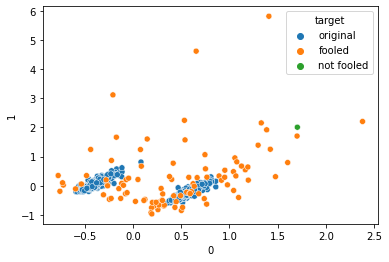

In [ ]:
get_pca_plot(diabetes_df, edited_fooled, edited_not_fooled)

### German Credit Dataset

In [ ]:
input_length = german_credit_df.shape[1]
noise_size = 100
loss = 'binary_crossentropy'
optimizer = Adam(lr=0.0002, beta_1=0.5)
losses_dir = '/content/drive/My Drive/DL_assignment4/german_credit_model/losses/'
weights_dir = '/content/drive/My Drive/DL_assignment4/german_credit_model/weights/'
german_credit_model = Adverisal(input_length, noise_size, loss, optimizer, weights_dir , losses_dir)
german_credit_model.train(german_credit_df, num_epochs = 60, batch_size = 30)

In [ ]:
fake_credit_data, credit_predictions = run_experiment(german_credit_model, experiment_steps=100, noise_size=100)

In [ ]:
credit_fooled, credit_not_fooled = test_performance(credit_predictions, fake_credit_data)
print('Number of smaples that fooled the discriminator: ' + str(len(credit_fooled)) + '/' + str(len(fake_credit_data)))

Number of smaples that fooled the discriminator: 99/100


In [ ]:
# Example that fooled the discriminator
credit_edited_fooled = [x[0][0] for x in credit_fooled]
credit_top_5_fooled = credit_edited_fooled[:5]
credit_top_fooled = pd.DataFrame(credit_top_5_fooled, columns = german_credit_df.columns)
credit_top_fooled.to_csv('/content/drive/Shareddrives/ann2/ass4/german_fooled_samples.csv', index = False)
credit_top_fooled

2         5         8  ...   20_A202      21_1      21_2
0  0.853351  0.000000  0.000000  ...  1.337413  1.201053  0.282027
1  0.961753  0.000000  0.000000  ...  0.000000  0.384693  1.077155
2  0.539102  0.000000  0.000000  ...  1.726787  0.838833  0.117139
3  0.000000  0.000000  0.461154  ...  0.380960  0.000000  0.000000
4  0.683473  0.269895  0.000000  ...  0.952072  0.373712  0.180005

[5 rows x 63 columns]

In [ ]:
# Example that did not fooled the discriminator
credit_edited_not_fooled = [x[0][0] for x in credit_not_fooled]
credit_top_5_not_fooled = credit_edited_not_fooled[:5]
credit_top_not_fooled = pd.DataFrame(credit_top_5_not_fooled, columns = german_credit_df.columns)
credit_top_not_fooled.to_csv('/content/drive/Shareddrives/ann2/ass4/german_not_fooled_samples.csv', index = False)
credit_top_not_fooled

2         5         8   11  ...  20_A201  20_A202      21_1  21_2
0  0.0  1.756926  1.211083  0.0  ...      0.0      0.0  0.354105   0.0

[1 rows x 63 columns]

In [ ]:
# mean distance for samples that fooled the discriminator
credit_euclidean_fooled = euclidean_distance(credit_top_fooled, german_credit_df)
credit_cosine_fooled = cosine_distance(credit_top_fooled, german_credit_df)

print("Mean Euclidean Distance for samples that fooled the discriminator: ",credit_euclidean_fooled )
print("Mean Cosine Distance for samples that fooled the discriminator: ",credit_cosine_fooled )

Mean Euclidean Distance for samples that fooled the discriminator:  5.434189685002495
Mean Cosine Distance for samples that fooled the discriminator:  0.6479335084985396


In [ ]:
# mean distance for samples that did not fool the discriminator
credit_euclidean_not_fooled = euclidean_distance(credit_top_not_fooled, german_credit_df)
credit_cosine_not_fooled = cosine_distance(credit_top_not_fooled, german_credit_df)

print("Mean Euclidean Distance for samples that could not fool discriminator: ",credit_euclidean_not_fooled )
print("Mean Cosine Distance for samples that could not fool the discriminator: ",credit_cosine_not_fooled )


Mean Euclidean Distance for samples that could not fool discriminator:  9.378315151236794
Mean Cosine Distance for samples that could not fool the discriminator:  0.8119821298085682


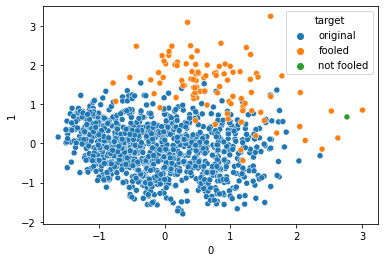

In [ ]:
get_pca_plot(german_credit_df, credit_edited_fooled, credit_edited_not_fooled)

# Part 2 – Generative Model for Sample Generation

## Installations and Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir 'model/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.io import arff
import random
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from keras.utils.vis_utils import plot_model
from sklearn import utils
from scipy import stats
from scipy.spatial import distance


DIABETES_PATH = '/content/drive/Shareddrives/DLL/ass4/diabetes.arff'
GERMAN_CREDIT_PATH = '/content/drive/Shareddrives/DLL/ass4/german_credit.arff'

## Data Preprocessing

Similar preprocessing of the datasets as in part 1.

The two datasets contain both categorial and numeric features:
*   **categorical features** should be converted binary columns, using One Hot Encoding Proces
*   As for the **numeric features**, before using these databases, their attribute values were all scaled to be in
the interval [0,1] by the min-max method. This was done because it makes the range for
all attributes to be the same, preventing one of them to dominate the others because of its
scale. This reduces the range of values that the generator has to produce as well

The total number of features for each dataset will be, as following: Number of numeric features + One Hot Encoding features 

In this part, additionally there's an option to split or not to classes, in order to allow work on separate classes for training the GAN; this was done as one of the experiements along the trainig process. 

In [ ]:
def load_data(data_path, reset_columns=True):
  '''receives data_path for an arff file, and returns a dataframe containing the data'''
  '''scales the data using MinMaxScaler and returns an scaled array'''
  data = arff.loadarff(data_path)
  df = pd.DataFrame(data[0])

  df[df.columns[-1]] = df[df.columns[-1]].astype('category').cat.codes

  if reset_columns:
    updated_columns = dict(zip(df.columns, list(range(len(df.columns)))))
    df.rename(columns=updated_columns)

  return df


def preprocess_data(df, data_type, drop_class=False, normalize=True, split=True, split_to_classes=False):
  pp_df = df.copy(deep=True)
  
  if data_type == 'german_credit':
    for column in pp_df.columns:
      if not isinstance(pp_df[column].iloc[0], np.floating):
        pp_df[column] = pp_df[column].astype('category')
        pp_df[column] = pp_df[column].cat.codes
  
  if drop_class:
    pp_df.drop(pp_df.columns[-1], axis=1, inplace=True)
  
  if normalize:
    scaler = MinMaxScaler(feature_range=(0,1))
    pp_df[pp_df.columns[:-1]] = scaler.fit_transform(pp_df[pp_df.columns[:-1]])

  if split_to_classes:
    X0 = pp_df[pp_df[pp_df.columns[-1]]==0][pp_df.columns[:-1]]
    X1 = pp_df[pp_df[pp_df.columns[-1]]==1][pp_df.columns[:-1]]
    y0 = pp_df[pp_df[pp_df.columns[-1]]==0][pp_df.columns[-1]]
    y1 = pp_df[pp_df[pp_df.columns[-1]]==1][pp_df.columns[-1]]
    return X0, X1, y0, y1

  X = pp_df[pp_df.columns[:-1]]
  y = pp_df[pp_df.columns[-1]]

  if not split:
    return X, y

  else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    return X_train, X_test, y_train, y_test

### Diabetes and German Credit Datasets

Both datasets descriptions are detailed in part 1 (and therefore skipped in this part).

Notation Comment regarding part 2 - 


*   'gc' - german credit 
*   'db' - diabetes



In [ ]:
db_df = load_data(DIABETES_PATH)
gc_df = load_data(GERMAN_CREDIT_PATH)

X_train_db, X_test_db, y_train_db, y_test_db = preprocess_data(db_df, data_type='diabetes', normalize=True)
X_train_gc, X_test_gc, y_train_gc, y_test_gc = preprocess_data(gc_df, data_type='german_credit', normalize=True)

X_all_db, y_all_db = preprocess_data(db_df, data_type='diabetes', normalize=True, split=False)
X_all_gc, y_all_gc = preprocess_data(gc_df, data_type='german_credit', normalize=True, split=False)

X_db0, X_db1, y_db0, y_db1 = preprocess_data(db_df, data_type='diabetes', normalize=True, split=False, split_to_classes=True)

## Creating Black-Box Model

RandomForest model is created using max forest depth of 5 (random state is set for results repetition).

In [ ]:
def train_clf(X, y):
  clf = RandomForestClassifier(max_depth=5, random_state=42)
  clf.fit(X, y)
  return clf


db_clf = train_clf(X_train_db, y_train_db)
gc_clf = train_clf(X_train_gc, y_train_gc)

### Classification Report - Diabetes Dataset

In [ ]:
print(classification_report(y_test_db, db_clf.predict(X_test_db)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       151
           1       0.66      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



### Classification Report - German Credit Dataset

In [ ]:
print(classification_report(y_test_gc, gc_clf.predict(X_test_gc)))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       209
           1       0.70      0.21      0.32        91

    accuracy                           0.73       300
   macro avg       0.72      0.59      0.58       300
weighted avg       0.73      0.73      0.68       300



## Create GAN Model

In [ ]:
class GAN():
  '''create GAN class which contains generator & discriminator and a combined model (the GAN itself) attributes'''
  def __init__(self, batch_size, learning_rate, z_shape, num_features, clf):
    self.batch_size = batch_size
    self.z_shape = z_shape
    self.num_features = num_features
    self.clf = clf
    
    self.generator = Generator(self.z_shape, self.batch_size, self.num_features).build_model()
    self.discriminator = Discriminator(self.batch_size, self.num_features).build_model()

    opt_disc = keras.optimizers.Adam(learning_rate=learning_rate/10)
    opt = keras.optimizers.Adam(learning_rate=learning_rate)

    self.discriminator.compile(loss='binary_crossentropy',
                               optimizer=opt_disc,
                               metrics=['accuracy'])
    
    z = keras.Input(shape=(self.z_shape,), name="GAN - Z Input")
    c = keras.Input(shape=(1,), name="GAN - C/Y Input")
    gen_tensor = self.generator([z, c])

    # the discriminator model is trained separately, thereby it's weights are marked as not trainable in this GAN model
    self.discriminator.trainable = False

    validity = self.discriminator([gen_tensor, c])

    self.combined_model = keras.Model([z, c], validity)
    self.combined_model.compile(loss='binary_crossentropy', optimizer=opt)

  def plot_losses(self, g_losses, d_losses, euclidean_distances):
    '''plots the losses of discriminator vs. generator during training step; includes as secondary axis the euclidean distance'''
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    epochs = list(range(len(g_losses)))
    epochs_euc = list(range(int(len(g_losses)/2)))
    ax1.plot(epochs, g_losses, label="Generator Loss")
    ax1.plot(epochs, d_losses, label="Discriminator Loss")
    ax2.plot([e*2 for e in epochs_euc], euclidean_distances, 'o')
    plt.title("Generator Vs. Discriminator Loss")
    plt.legend()
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax2.set_ylabel("Euclidean Distance")
    plt.show()


  def shuffled_batch_data(self, gen_samples, y, c , one_labels, zero_labels):
    '''takes a batch of gen samples and labels, and returns the same batch shuffeled; this was included as part of the tests (examine the effect of batch shuffling'''
    samples = np.concatenate([gen_samples, gen_samples], axis=0)
    c_or_y = np.concatenate([c.reshape(-1, 1), y.reshape(-1, 1)], axis=0)
    labels = np.concatenate([zero_labels, one_labels], axis=0)

    batch_data = np.concatenate([samples, c_or_y, labels], axis=1)
    shuffled_batch_data = utils.shuffle(batch_data)

    samples, c_or_y, labels = shuffled_batch_data[:, :8], shuffled_batch_data[:, 8], shuffled_batch_data[:, 9]

    return samples, c_or_y, labels

  def load(self, path):
    '''loads weights of the generator for recreating results from specific generator from training'''
    self.generator = Generator(self.batch_size)
    self.generator = self.generator.load_weights(path)
    return self.generator

  def train(self, data, epochs, save_interval):
    '''trains GAN in following way:
    1) create batch size of samples from generator
    2) predict the black-box model's performance on these samples
    3) train discriminator on batch of samples (integrated an option of training D each 2 epochs)
    4) update discriminator's parameters according to loss (part of 'train_on_batch' Keras function)
    5) creating another batch size of samples from generator
    6) train generator on batch of samples (using fake labels, in order to "push" G in the correct direction)
    7) update generator's parameters according to loss (part of 'train_on_batch' Keras function)
    8) plot the discriminator's and generator's losses each 10 epochs for analysis'''
    
    #data_cols = data.columns
    g_losses, d_losses, euclidean_distances = [], [], []
    train_steps_per_epoch = int(data.shape[0] / self.batch_size)
    train_steps = epochs * train_steps_per_epoch
    current_epoch = 0

    for step in range(train_steps):
      # train the discriminator
      
      #z = tf.random.normal(shape=(self.batch_size, self.latent_dim))
      z = np.random.normal(size=(self.batch_size, self.z_shape))
      c = np.random.uniform(low=0.0, high=1.0, size=self.batch_size)
      #c = np.random.uniform(low=0.0, high=1.0, size=(self.batch_size, 1))

      gen_samples = self.generator.predict([z, c]) # need to insert latent_vectors+c into generator

      BB_predict_proba = self.clf.predict_proba(gen_samples)
      y = np.amax(BB_predict_proba, axis=1)
      #y = y.reshape(-1,1)

      #print("y shape: {}".format(y.shape))
      #print("c shape: {}".format(c.shape))


      one_labels = np.ones(shape=self.batch_size)
      zero_labels = np.zeros(shape=self.batch_size)
      one_labels += (np.random.uniform(low=-0.3, high=0.3, size=self.batch_size))
      zero_labels += (np.random.uniform(low=-0.3, high=0.3, size=self.batch_size))
      
      #samples, c_or_y, labels = self.shuffled_batch_data(gen_samples, y, c, one_labels, zero_labels)
      #print("samples shape: {}".format(samples.shape))
      #print("c_or_y shape: {}".format(c_or_y.shape))
      #print("labels shape: {}".format(labels.shape))

      #d_loss = self.discriminator.train_on_batch(x=[samples, c_or_y], y=labels)
      
      #if (current_epoch % 6) == 0:
      #  temp = np.copy(one_labels)
      #  one_labels = zero_labels
      #  zero_labels = temp

      # check input to discriminator
      if current_epoch % 2 == 0:
        d_loss_real = self.discriminator.train_on_batch(x=[gen_samples, y], y=one_labels)
        d_loss_fake = self.discriminator.train_on_batch(x=[gen_samples, c], y=zero_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      # train the generator

      z = np.random.normal(size=(self.batch_size, self.z_shape))
      c = np.random.uniform(low=0.0, high=1.0, size=self.batch_size)

      misleading_labels = np.ones(shape=(self.batch_size, 1))
      g_loss = self.combined_model.train_on_batch(x=[z, c], y=misleading_labels)

      # print progress
      if (step % train_steps_per_epoch) == 0:
        current_epoch += 1
        print("epoch {}: D loss: {:.3f} | G loss: {:.3f}".format(current_epoch, d_loss[0], float(g_loss)))
        g_losses.append(g_loss)
        d_losses.append(d_loss[0])


      if current_epoch % 2 == 0 and step % train_steps_per_epoch == 0 and step is not 0:
        euclidean_distances.append(euclidean_distance(gen_samples, data))
        base_path = 'model/' + '{}_weights_epoch_{}.h5'
        self.generator.save_weights(base_path.format('generator', current_epoch))
        self.discriminator.save_weights(base_path.format('discriminator', current_epoch))
    
      if current_epoch % 10 == 0 and step % train_steps_per_epoch == 0:
        self.plot_losses(g_losses, d_losses, euclidean_distances)


class Generator():
  '''returns a generator instance'''
  def __init__(self, z_shape, batch_size, num_features):
    self.batch_size = batch_size
    self.num_features = num_features
    self.z_shape = z_shape

  def build_model(self):
    z_input = keras.Input(shape=(self.z_shape,), batch_size=self.batch_size, name="z_input")
    c_input = keras.Input(shape=(1,), batch_size=self.batch_size, name="c_input")

    x1 = layers.Dense(512, name="gen_z_input_L1")(z_input)
    x1 = layers.LeakyReLU(alpha=0.2)(x1)
    x1 = layers.Dropout(0.4)(x1)
    x1 = layers.Dense(128, name="gen_z_input_L2")(x1)
    x1 = layers.LeakyReLU(alpha=0.2)(x1)
    x1 = layers.Dropout(0.4)(x1) 
    x1 = layers.Dense(32, name="gen_z_input_L3")(x1)
    x1 = layers.LeakyReLU(alpha=0.2)(x1)
    x1 = layers.Dropout(0.4)(x1)

    x2 = layers.Dense(256, name="gen_c_input_L1")(c_input)
    x2 = layers.LeakyReLU(alpha=0.2)(x2)
    x2 = layers.Dropout(0.4)(x2) ## added
    x2 = layers.Dense(128, name="gen_c_input_L2")(x2)
    x2 = layers.LeakyReLU(alpha=0.2)(x2)
    x2 = layers.Dropout(0.4)(x2) ## added
    x2 = layers.Dense(64, name="gen_c_input_L3")(x2)
    x2 = layers.LeakyReLU(alpha=0.2)(x2)
    x2 = layers.Dropout(0.4)(x2)


    concat_layer = layers.Concatenate()([x1, x2])
    output = layers.Dense(self.num_features, activation="sigmoid", name="output")(concat_layer)

    return keras.Model(inputs=[z_input, c_input], outputs=output)


class Discriminator():
  '''returns a discriminator's instance'''
  def __init__(self, batch_size, num_features):
    self.batch_size = batch_size
    self.num_features = num_features

  def build_model(self):
    sample_input = keras.Input(shape=(self.num_features,), batch_size=self.batch_size, name="sample_input")
    y_or_c_input = keras.Input(shape=(1,), batch_size=self.batch_size, name="y_or_c_input")

    x1 = layers.Dense(512)(sample_input)
    x1 = layers.LeakyReLU(alpha=0.2)(x1)
    x1 = layers.Dropout(0.4)(x1) 
    x1 = layers.Dense(128)(x1)
    x1 = layers.LeakyReLU(alpha=0.2)(x1)
    x1 = layers.Dropout(0.4)(x1) 
    x1 = layers.Dense(32)(x1)
    x1 = layers.LeakyReLU(alpha=0.2)(x1)
    x1 = layers.Dropout(0.4)(x1)

    x2 = layers.Dense(256)(y_or_c_input)
    x2 = layers.LeakyReLU(alpha=0.2)(x2)
    x2 = layers.Dropout(0.4)(x2) 
    x2 = layers.Dense(128)(x2)
    x2 = layers.LeakyReLU(alpha=0.2)(x2)
    x2 = layers.Dropout(0.4)(x2)
    x2 = layers.Dense(64)(x2)
    x2 = layers.LeakyReLU(alpha=0.2)(x2)
    x2 = layers.Dropout(0.4)(x2)

    concat_layer = layers.Concatenate()([x1, x2])
    output = layers.Dense(1, activation="sigmoid")(concat_layer)

    return keras.Model(inputs=[sample_input, y_or_c_input], outputs=output)

## Training & Analysis

In [ ]:
def euclidean_distance(generated_samples, reference_df):
  distances = []
  for j in range(generated_samples.shape[0]):
    gen_sample = np.array(generated_samples[j])
    for i in range(reference_df.shape[0]):
      dst = distance.euclidean(gen_sample, np.array(reference_df.iloc[i]))
      distances.append(dst)
  return np.mean(distances)


def generate_report(gan_model, clf, X_all, X_test, weights_epoch=None):
  '''returns:
  1) histogram of the original dataset that is fed blackbox model
  2) histogram of the generator samples that are fed into the black-box model'''
  
  if weights_epoch:
    gan_model.generator.load_weights('/content/model/generator_weights_epoch_'+str(weights_epoch)+'.h5')

  #predict_probab from clf: avg / min / max, figure showing distribution
  predict_proba = clf.predict_proba(X_test)
  predict = clf.predict(X_test)
  c_scores = np.amax(predict_proba, axis=1) * 100
  c_scores = np.concatenate([c_scores.reshape(-1, 1), predict.reshape(-1, 1)], axis=1)
  
  plt.hist(c_scores[c_scores[:,1]==0][:,0], bins=20, label='class 0', alpha=0.8)
  #if c_scores[c_scores[:,1]==1].size != 0:
  plt.hist(c_scores[c_scores[:,1]==1][:,0], bins=20, label='class 1', alpha=0.8)
  plt.title("Real Samples - BB Model Confidence Scores Distribution")
  plt.xlabel("Confidence Score (%)")
  plt.legend()
  print("\n\nAvg C Score: {:.1f}\nMin C Score: {:.1f}\nMax C Score: {:.1f}".format(c_scores[:,:-1].mean(), c_scores[:,:-1].min(), c_scores[:,:-1].max()))
  plt.show()

  #generate 1000 samples from generator
  z = np.random.normal(size=(1000, 128))
  c = np.random.uniform(low=0.0, high=1.0, size=1000)
  gen_samples = gan_model.generator.predict([z, c])

  predict_proba = clf.predict_proba(gen_samples)
  predict = clf.predict(gen_samples)
  gen_c_scores = np.amax(predict_proba, axis=1) * 100
  gen_c_scores = np.concatenate([gen_c_scores.reshape(-1, 1), predict.reshape(-1, 1)], axis=1)
  
  plt.hist(gen_c_scores[gen_c_scores[:,1]==0][:,0], bins=20, label='class 0', alpha=0.8)
  if gen_c_scores[gen_c_scores[:,1]==1].size != 0:
    plt.hist(gen_c_scores[gen_c_scores[:,1]==1][:,0], bins=20, label='class 1', alpha=0.8)
  plt.title("Fake Samples - BB Model Confidence Scores Distribution")
  plt.xlabel("Confidence Score (%)")
  plt.legend()
  print("\n\nAvg Confidence Score: {:.1f}\nMin Confidence Score: {:.1f}\nMax Confidence Score: {:.1f}".format(gen_c_scores[:,:-1].mean(), gen_c_scores[:,:-1].min(), gen_c_scores[:,:-1].max()))
  plt.show()

### Diabetes Dataset

In [ ]:
gan_model_db = GAN(32, 0.0001, 128, X_all_db.shape[1], db_clf)

Gan Model Architecture:


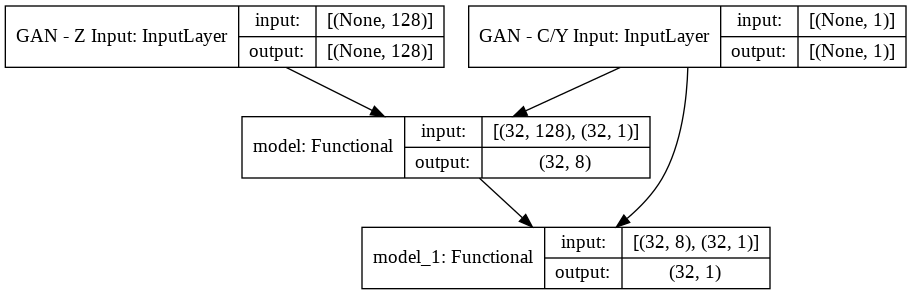

In [ ]:
print("Gan Model Architecture:")
plot_model(gan_model_db.combined_model, show_shapes=True, show_layer_names=True)

Generator Model Architecture:


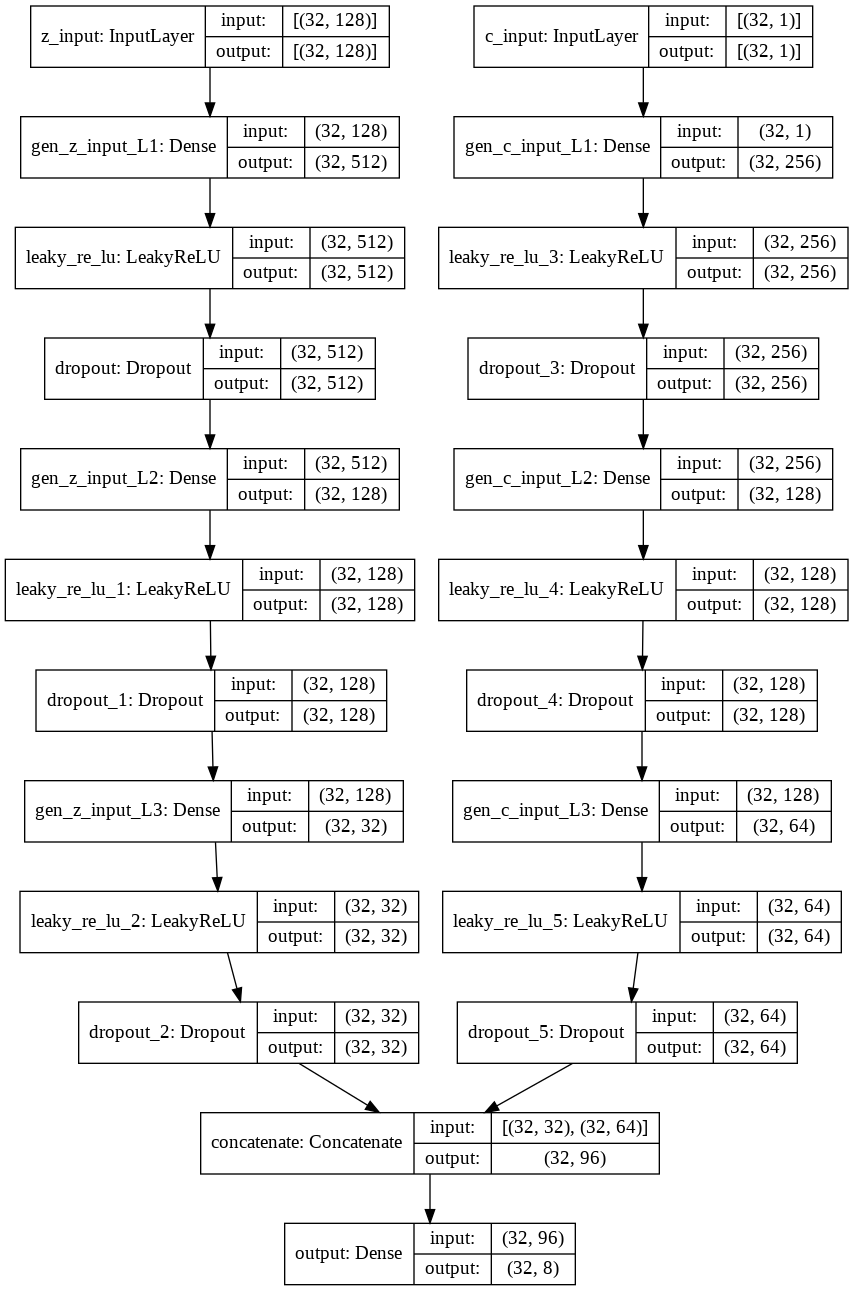

In [ ]:
print("Generator Model Architecture:")
plot_model(gan_model_db.generator, show_shapes=True, show_layer_names=True)

Discriminator Model Architecture:


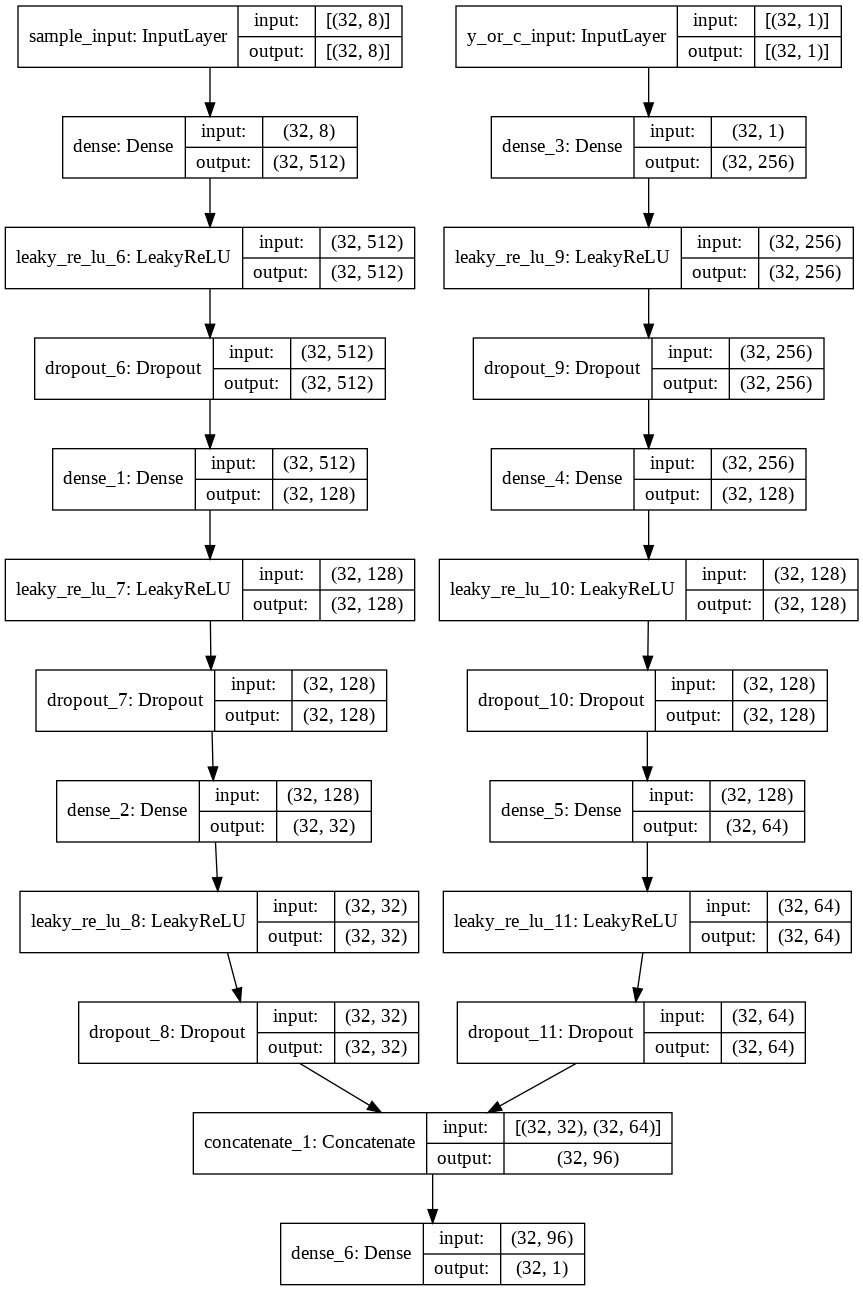

In [ ]:
print("Discriminator Model Architecture:")
plot_model(gan_model_db.discriminator, show_shapes=True, show_layer_names=True)

epoch 1: D loss: 0.703 | G loss: 0.702
epoch 2: D loss: 0.703 | G loss: 0.693
epoch 3: D loss: 0.691 | G loss: 0.673
epoch 4: D loss: 0.691 | G loss: 0.646
epoch 5: D loss: 0.690 | G loss: 0.661
epoch 6: D loss: 0.690 | G loss: 0.649
epoch 7: D loss: 0.695 | G loss: 0.657
epoch 8: D loss: 0.695 | G loss: 0.650
epoch 9: D loss: 0.706 | G loss: 0.656
epoch 10: D loss: 0.706 | G loss: 0.670


No handles with labels found to put in legend.


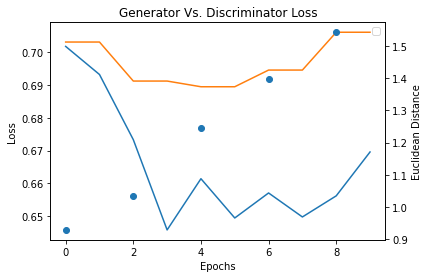

epoch 11: D loss: 0.710 | G loss: 0.650
epoch 12: D loss: 0.710 | G loss: 0.675
epoch 13: D loss: 0.711 | G loss: 0.640
epoch 14: D loss: 0.711 | G loss: 0.652
epoch 15: D loss: 0.700 | G loss: 0.661
epoch 16: D loss: 0.700 | G loss: 0.636
epoch 17: D loss: 0.703 | G loss: 0.649
epoch 18: D loss: 0.703 | G loss: 0.674
epoch 19: D loss: 0.695 | G loss: 0.645
epoch 20: D loss: 0.695 | G loss: 0.641


No handles with labels found to put in legend.


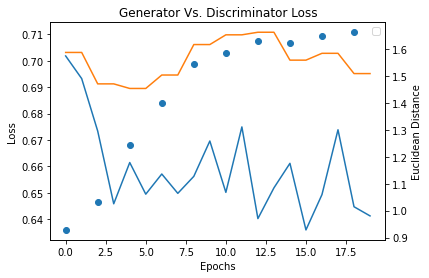

epoch 21: D loss: 0.696 | G loss: 0.639
epoch 22: D loss: 0.696 | G loss: 0.658
epoch 23: D loss: 0.712 | G loss: 0.671
epoch 24: D loss: 0.712 | G loss: 0.653
epoch 25: D loss: 0.715 | G loss: 0.663
epoch 26: D loss: 0.715 | G loss: 0.669
epoch 27: D loss: 0.679 | G loss: 0.650
epoch 28: D loss: 0.679 | G loss: 0.658
epoch 29: D loss: 0.691 | G loss: 0.650
epoch 30: D loss: 0.691 | G loss: 0.655


No handles with labels found to put in legend.


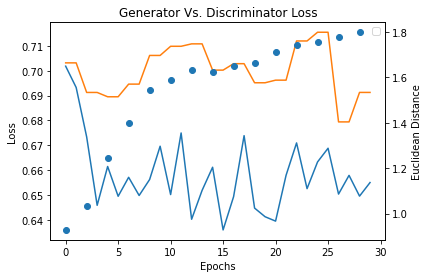

epoch 31: D loss: 0.709 | G loss: 0.677
epoch 32: D loss: 0.709 | G loss: 0.668
epoch 33: D loss: 0.685 | G loss: 0.648
epoch 34: D loss: 0.685 | G loss: 0.647
epoch 35: D loss: 0.710 | G loss: 0.638
epoch 36: D loss: 0.710 | G loss: 0.649
epoch 37: D loss: 0.701 | G loss: 0.654
epoch 38: D loss: 0.701 | G loss: 0.672
epoch 39: D loss: 0.698 | G loss: 0.638
epoch 40: D loss: 0.698 | G loss: 0.670


No handles with labels found to put in legend.


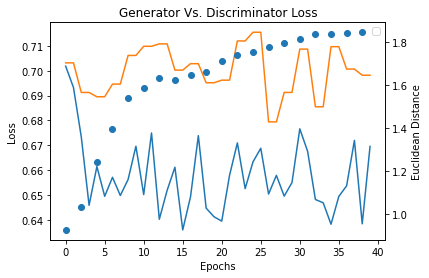

In [ ]:
gan_model_db.train(X_all_db, 40, 20)



Avg C Score: 73.9
Min C Score: 50.4
Max C Score: 98.3


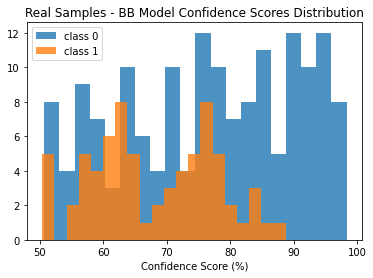



Avg Confidence Score: 61.6
Min Confidence Score: 50.0
Max Confidence Score: 77.9


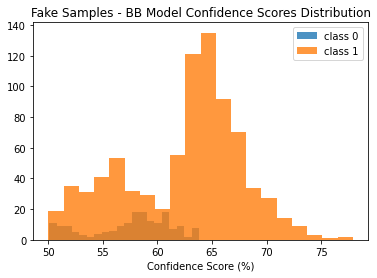

In [ ]:
generate_report(gan_model_db, db_clf, X_all_db, X_test_db, 2)

### German Credit Dataset

In [ ]:
gan_model_gc = GAN(32, 0.0001, 128, X_all_gc.shape[1], gc_clf)

Gan Model Architecture:


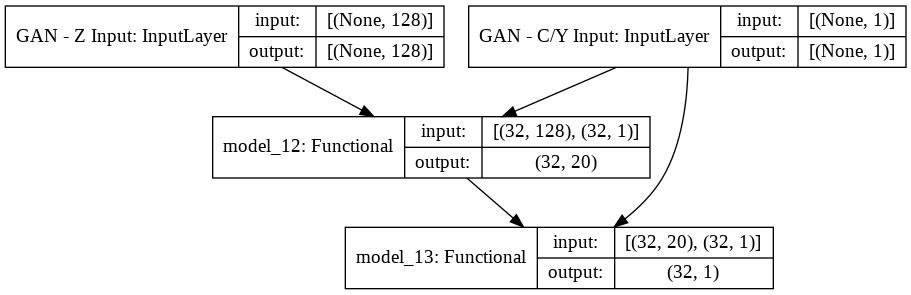

In [ ]:
print("Gan Model Architecture:")
plot_model(gan_model_gc.combined_model, show_shapes=True, show_layer_names=True)

Generator Model Architecture:


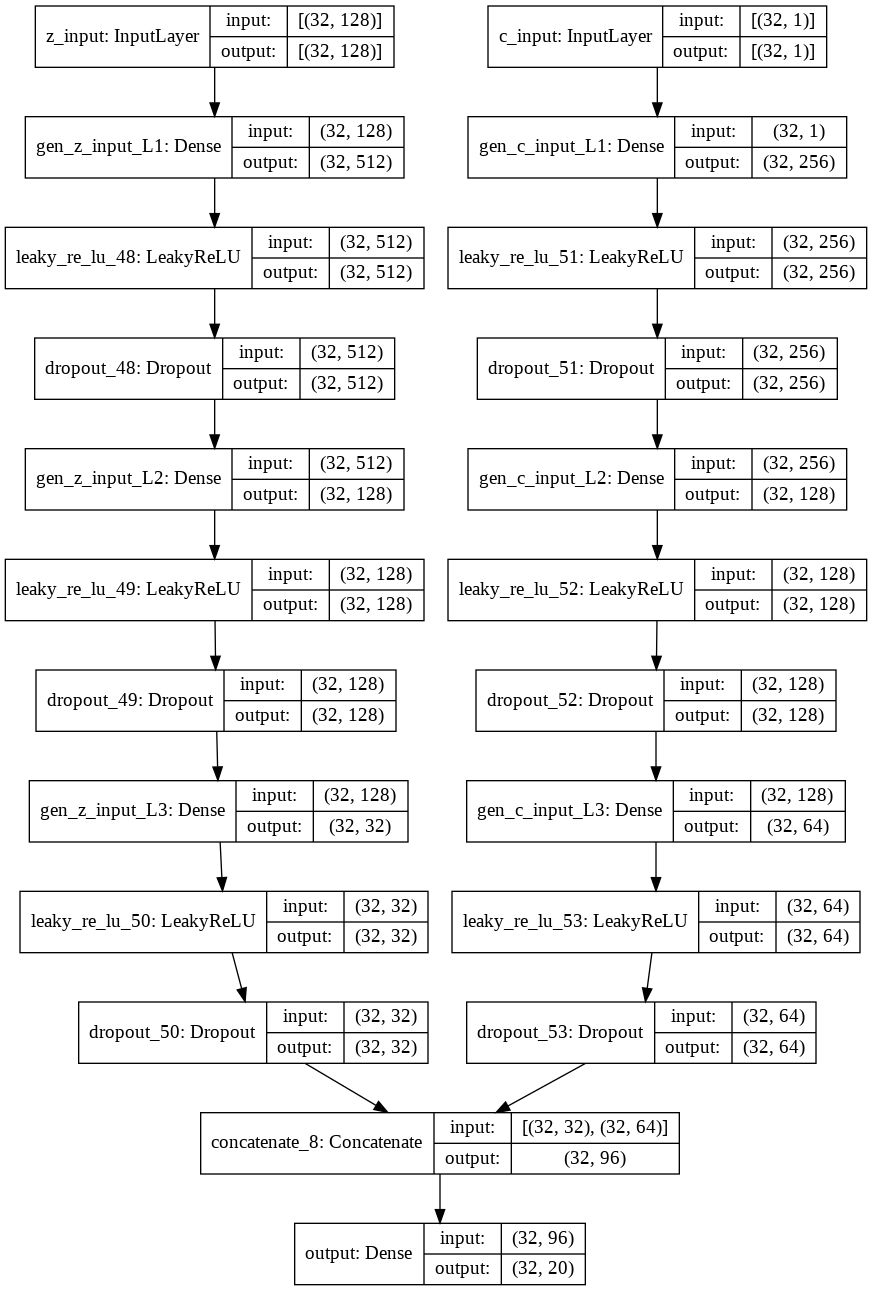

In [ ]:
print("Generator Model Architecture:")
plot_model(gan_model_gc.generator, show_shapes=True, show_layer_names=True)

Discriminator Model Architecture:


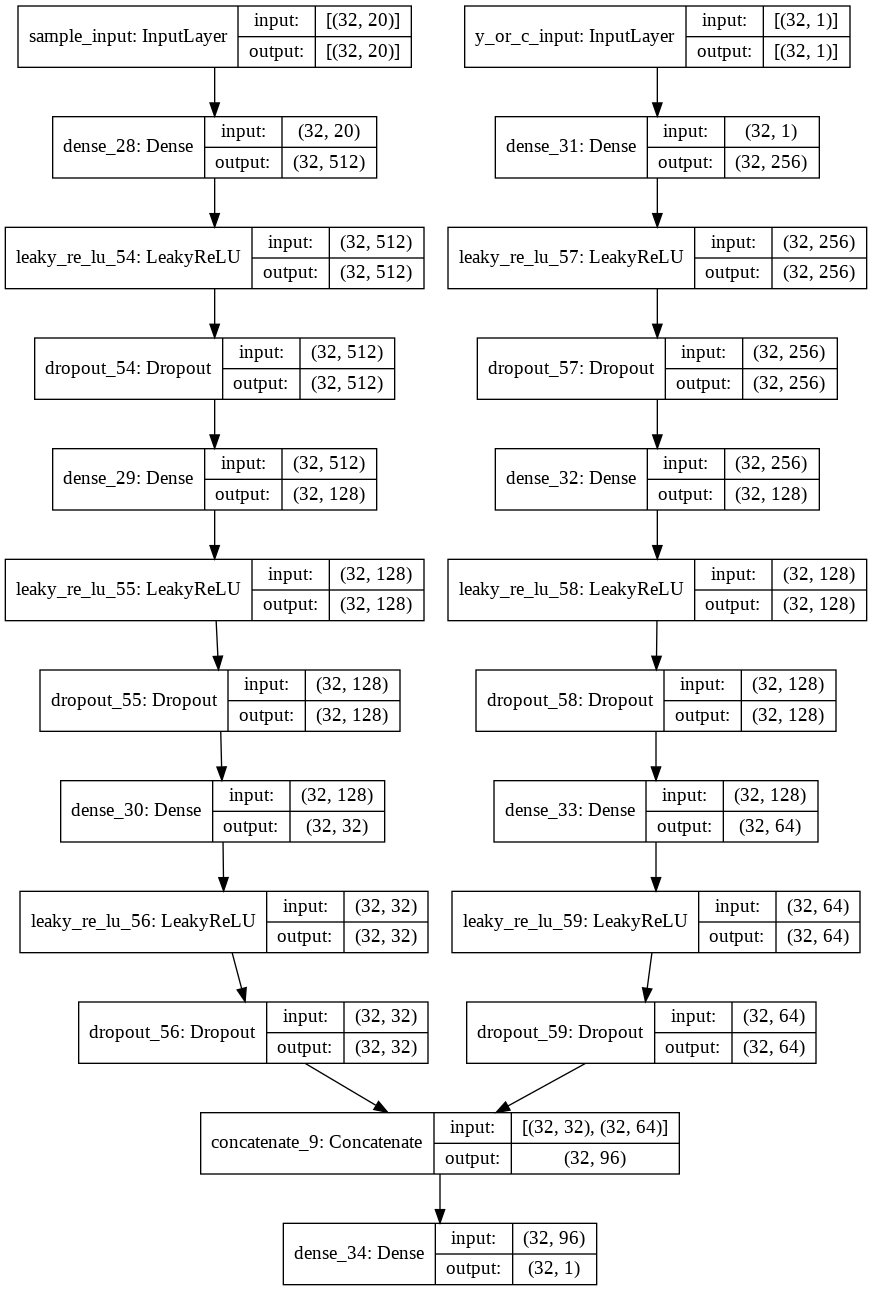

In [ ]:
print("Discriminator Model Architecture:")
plot_model(gan_model_gc.discriminator, show_shapes=True, show_layer_names=True)

epoch 1: D loss: 0.689 | G loss: 0.646
epoch 2: D loss: 0.689 | G loss: 0.623
epoch 3: D loss: 0.707 | G loss: 0.621
epoch 4: D loss: 0.707 | G loss: 0.620
epoch 5: D loss: 0.706 | G loss: 0.596
epoch 6: D loss: 0.706 | G loss: 0.579
epoch 7: D loss: 0.719 | G loss: 0.612
epoch 8: D loss: 0.719 | G loss: 0.594
epoch 9: D loss: 0.725 | G loss: 0.614
epoch 10: D loss: 0.725 | G loss: 0.599


No handles with labels found to put in legend.


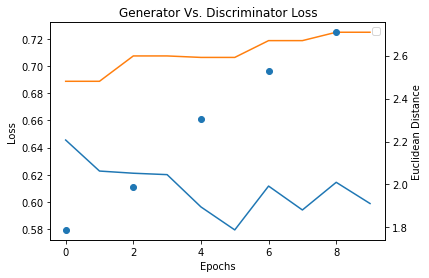

epoch 11: D loss: 0.698 | G loss: 0.598
epoch 12: D loss: 0.698 | G loss: 0.601
epoch 13: D loss: 0.714 | G loss: 0.585
epoch 14: D loss: 0.714 | G loss: 0.627
epoch 15: D loss: 0.693 | G loss: 0.620
epoch 16: D loss: 0.693 | G loss: 0.619
epoch 17: D loss: 0.697 | G loss: 0.627
epoch 18: D loss: 0.697 | G loss: 0.624
epoch 19: D loss: 0.675 | G loss: 0.654
epoch 20: D loss: 0.675 | G loss: 0.616


No handles with labels found to put in legend.


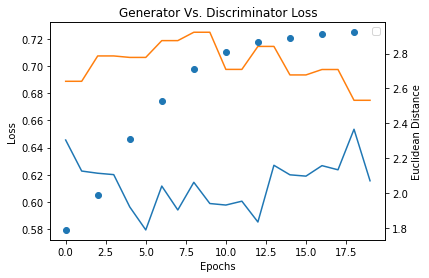

epoch 21: D loss: 0.717 | G loss: 0.632
epoch 22: D loss: 0.717 | G loss: 0.649
epoch 23: D loss: 0.702 | G loss: 0.670
epoch 24: D loss: 0.702 | G loss: 0.666
epoch 25: D loss: 0.683 | G loss: 0.618
epoch 26: D loss: 0.683 | G loss: 0.666
epoch 27: D loss: 0.688 | G loss: 0.658
epoch 28: D loss: 0.688 | G loss: 0.674
epoch 29: D loss: 0.709 | G loss: 0.646
epoch 30: D loss: 0.709 | G loss: 0.661


No handles with labels found to put in legend.


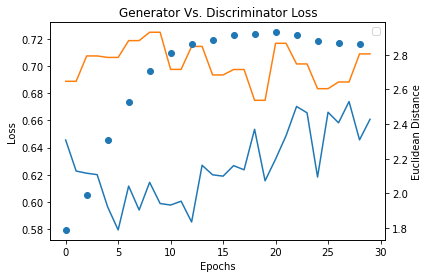

epoch 31: D loss: 0.696 | G loss: 0.658
epoch 32: D loss: 0.696 | G loss: 0.648
epoch 33: D loss: 0.717 | G loss: 0.690
epoch 34: D loss: 0.717 | G loss: 0.636
epoch 35: D loss: 0.699 | G loss: 0.655
epoch 36: D loss: 0.699 | G loss: 0.650
epoch 37: D loss: 0.698 | G loss: 0.667
epoch 38: D loss: 0.698 | G loss: 0.654
epoch 39: D loss: 0.692 | G loss: 0.687
epoch 40: D loss: 0.692 | G loss: 0.670


No handles with labels found to put in legend.


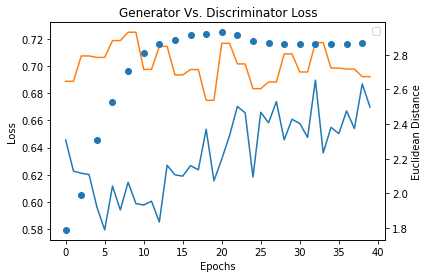

epoch 41: D loss: 0.691 | G loss: 0.657


In [ ]:
gan_model_gc.train(X_all_gc, 40, 20)



Avg C Score: 72.1
Min C Score: 50.3
Max C Score: 93.2


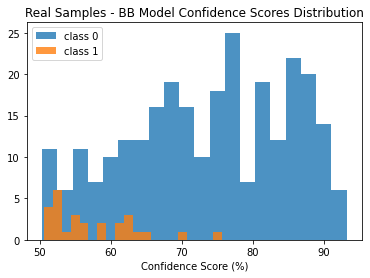



Avg Confidence Score: 55.5
Min Confidence Score: 50.0
Max Confidence Score: 62.5


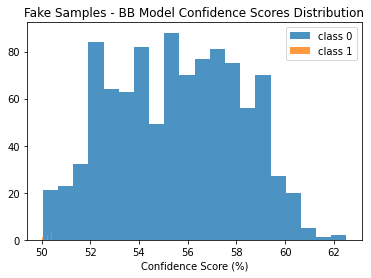

In [ ]:
generate_report(gan_model_gc, gc_clf, X_all_gc, X_test_gc, 8)